# Example of masks

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

## Creating an instance

An instance must be created before starting to operate with vector masks. The initialization accepts several arguments.

In [2]:
from diffractio import degrees, mm, np, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_tests import save_figure_test
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY
from py_pol.jones_matrix import Jones_matrix

number of processors: 32


In [3]:
from matplotlib import rcParams
rcParams['figure.figsize']=[10,10]
rcParams['figure.dpi']=200

## equal mask

This function provides the same mask for $E_x$ and $E_y$ fields.

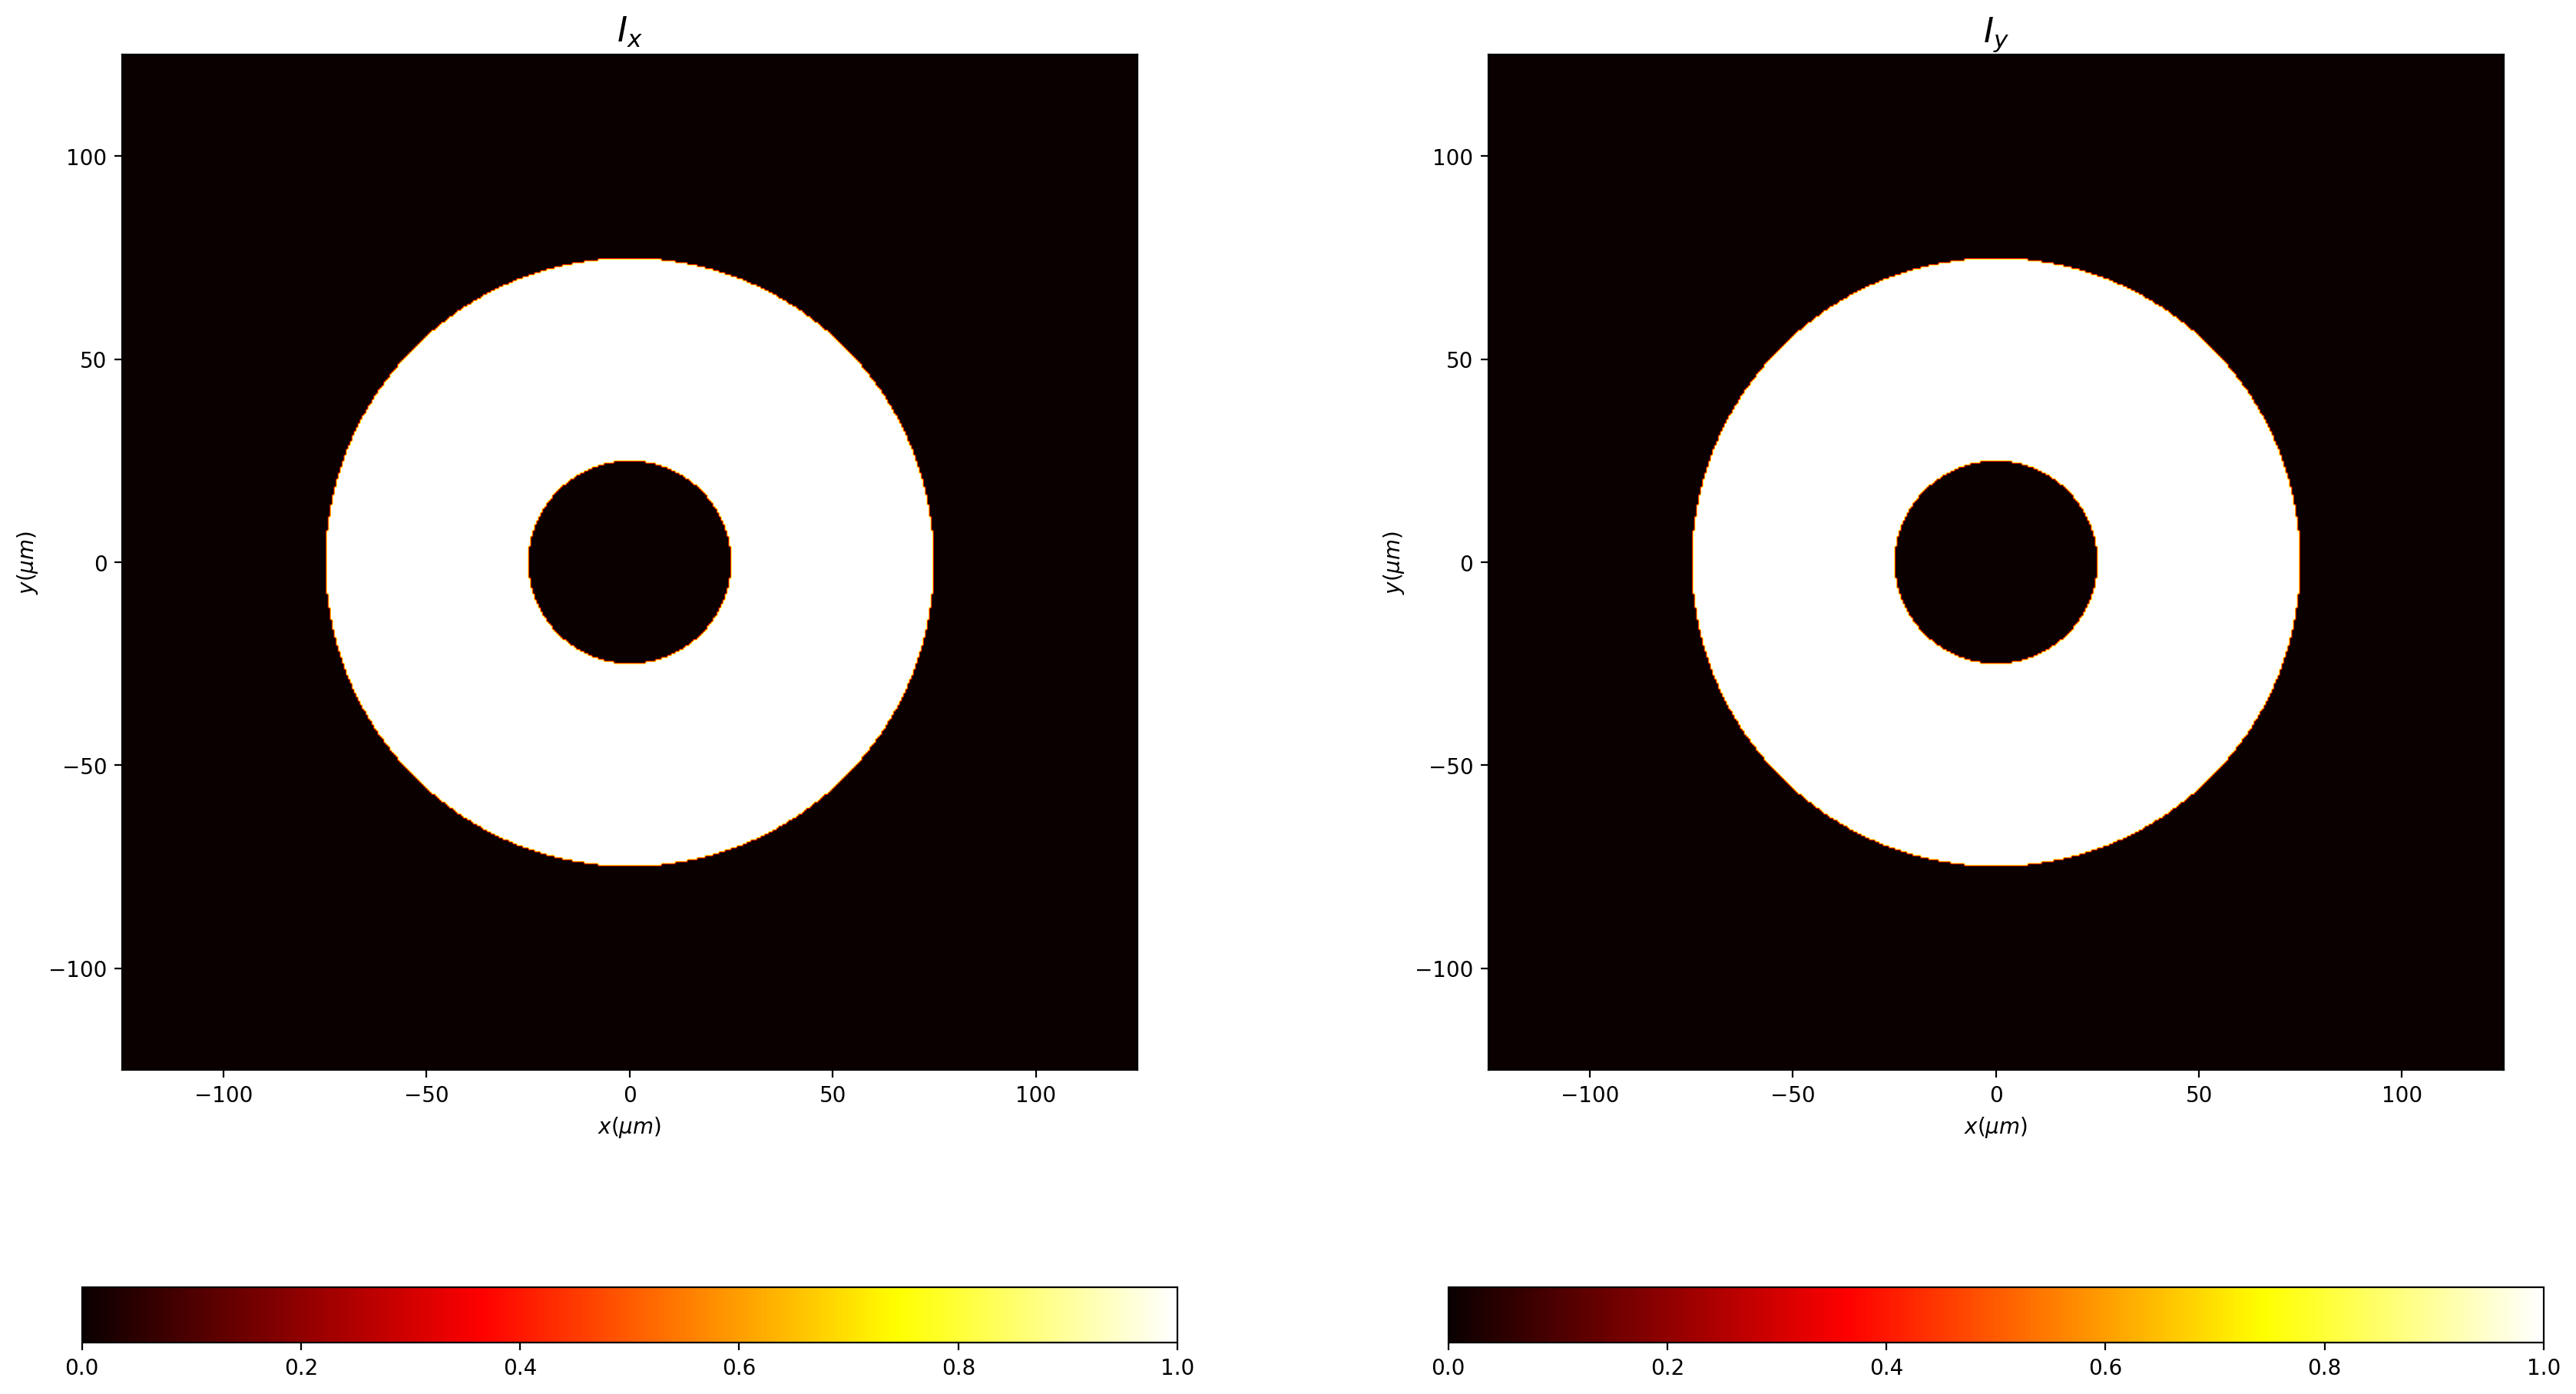

In [4]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
vc = Vector_paraxial_mask_XY(x0, y0, wavelength)
vc.equal_mask(mask=mask)
vc.draw(kind='intensities');

## unique_mask

This function uses the same mask for $E_x$ and $E_y$ fields, and it provides a different amplitud-phase to each field.

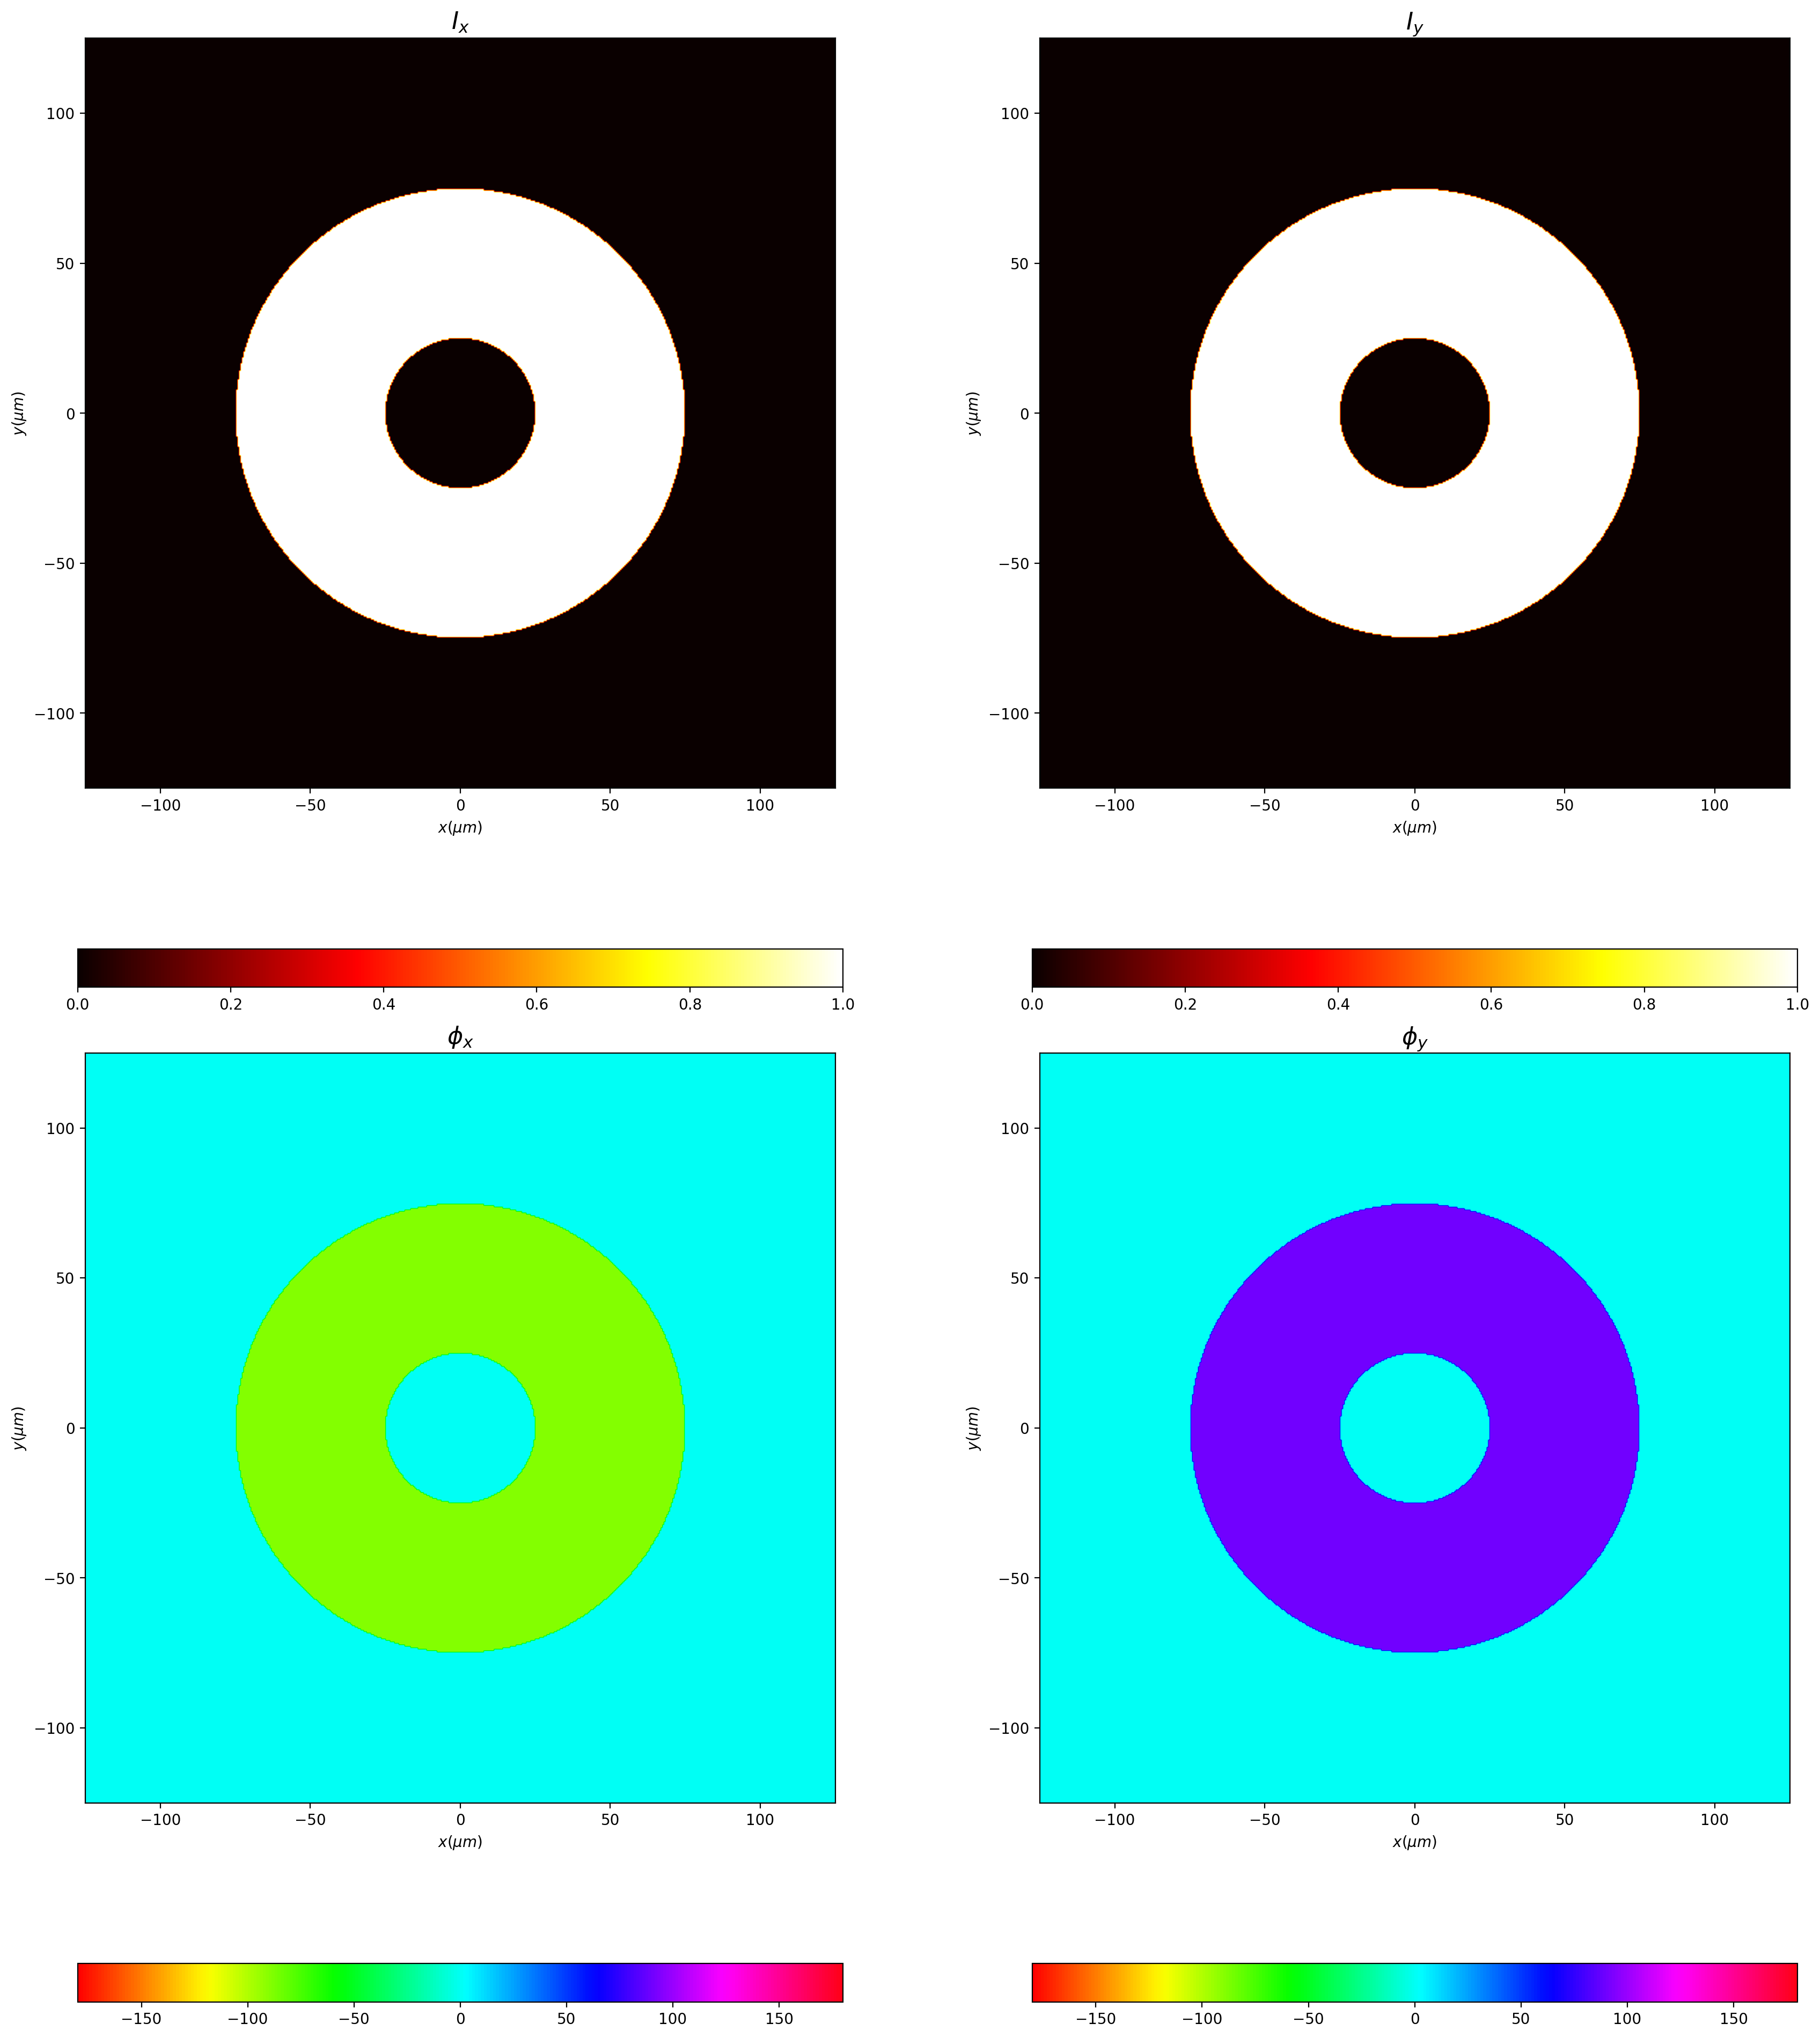

In [5]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
vc = Vector_paraxial_mask_XY(x0, y0, wavelength)
vc.unique_mask(mask=mask, v=(np.exp(-1j*np.pi/2), np.exp(1j*np.pi/2)))
vc.draw(kind='fields');

## global mask

We have a field Ex, Ey and it is multiplied by a mask.

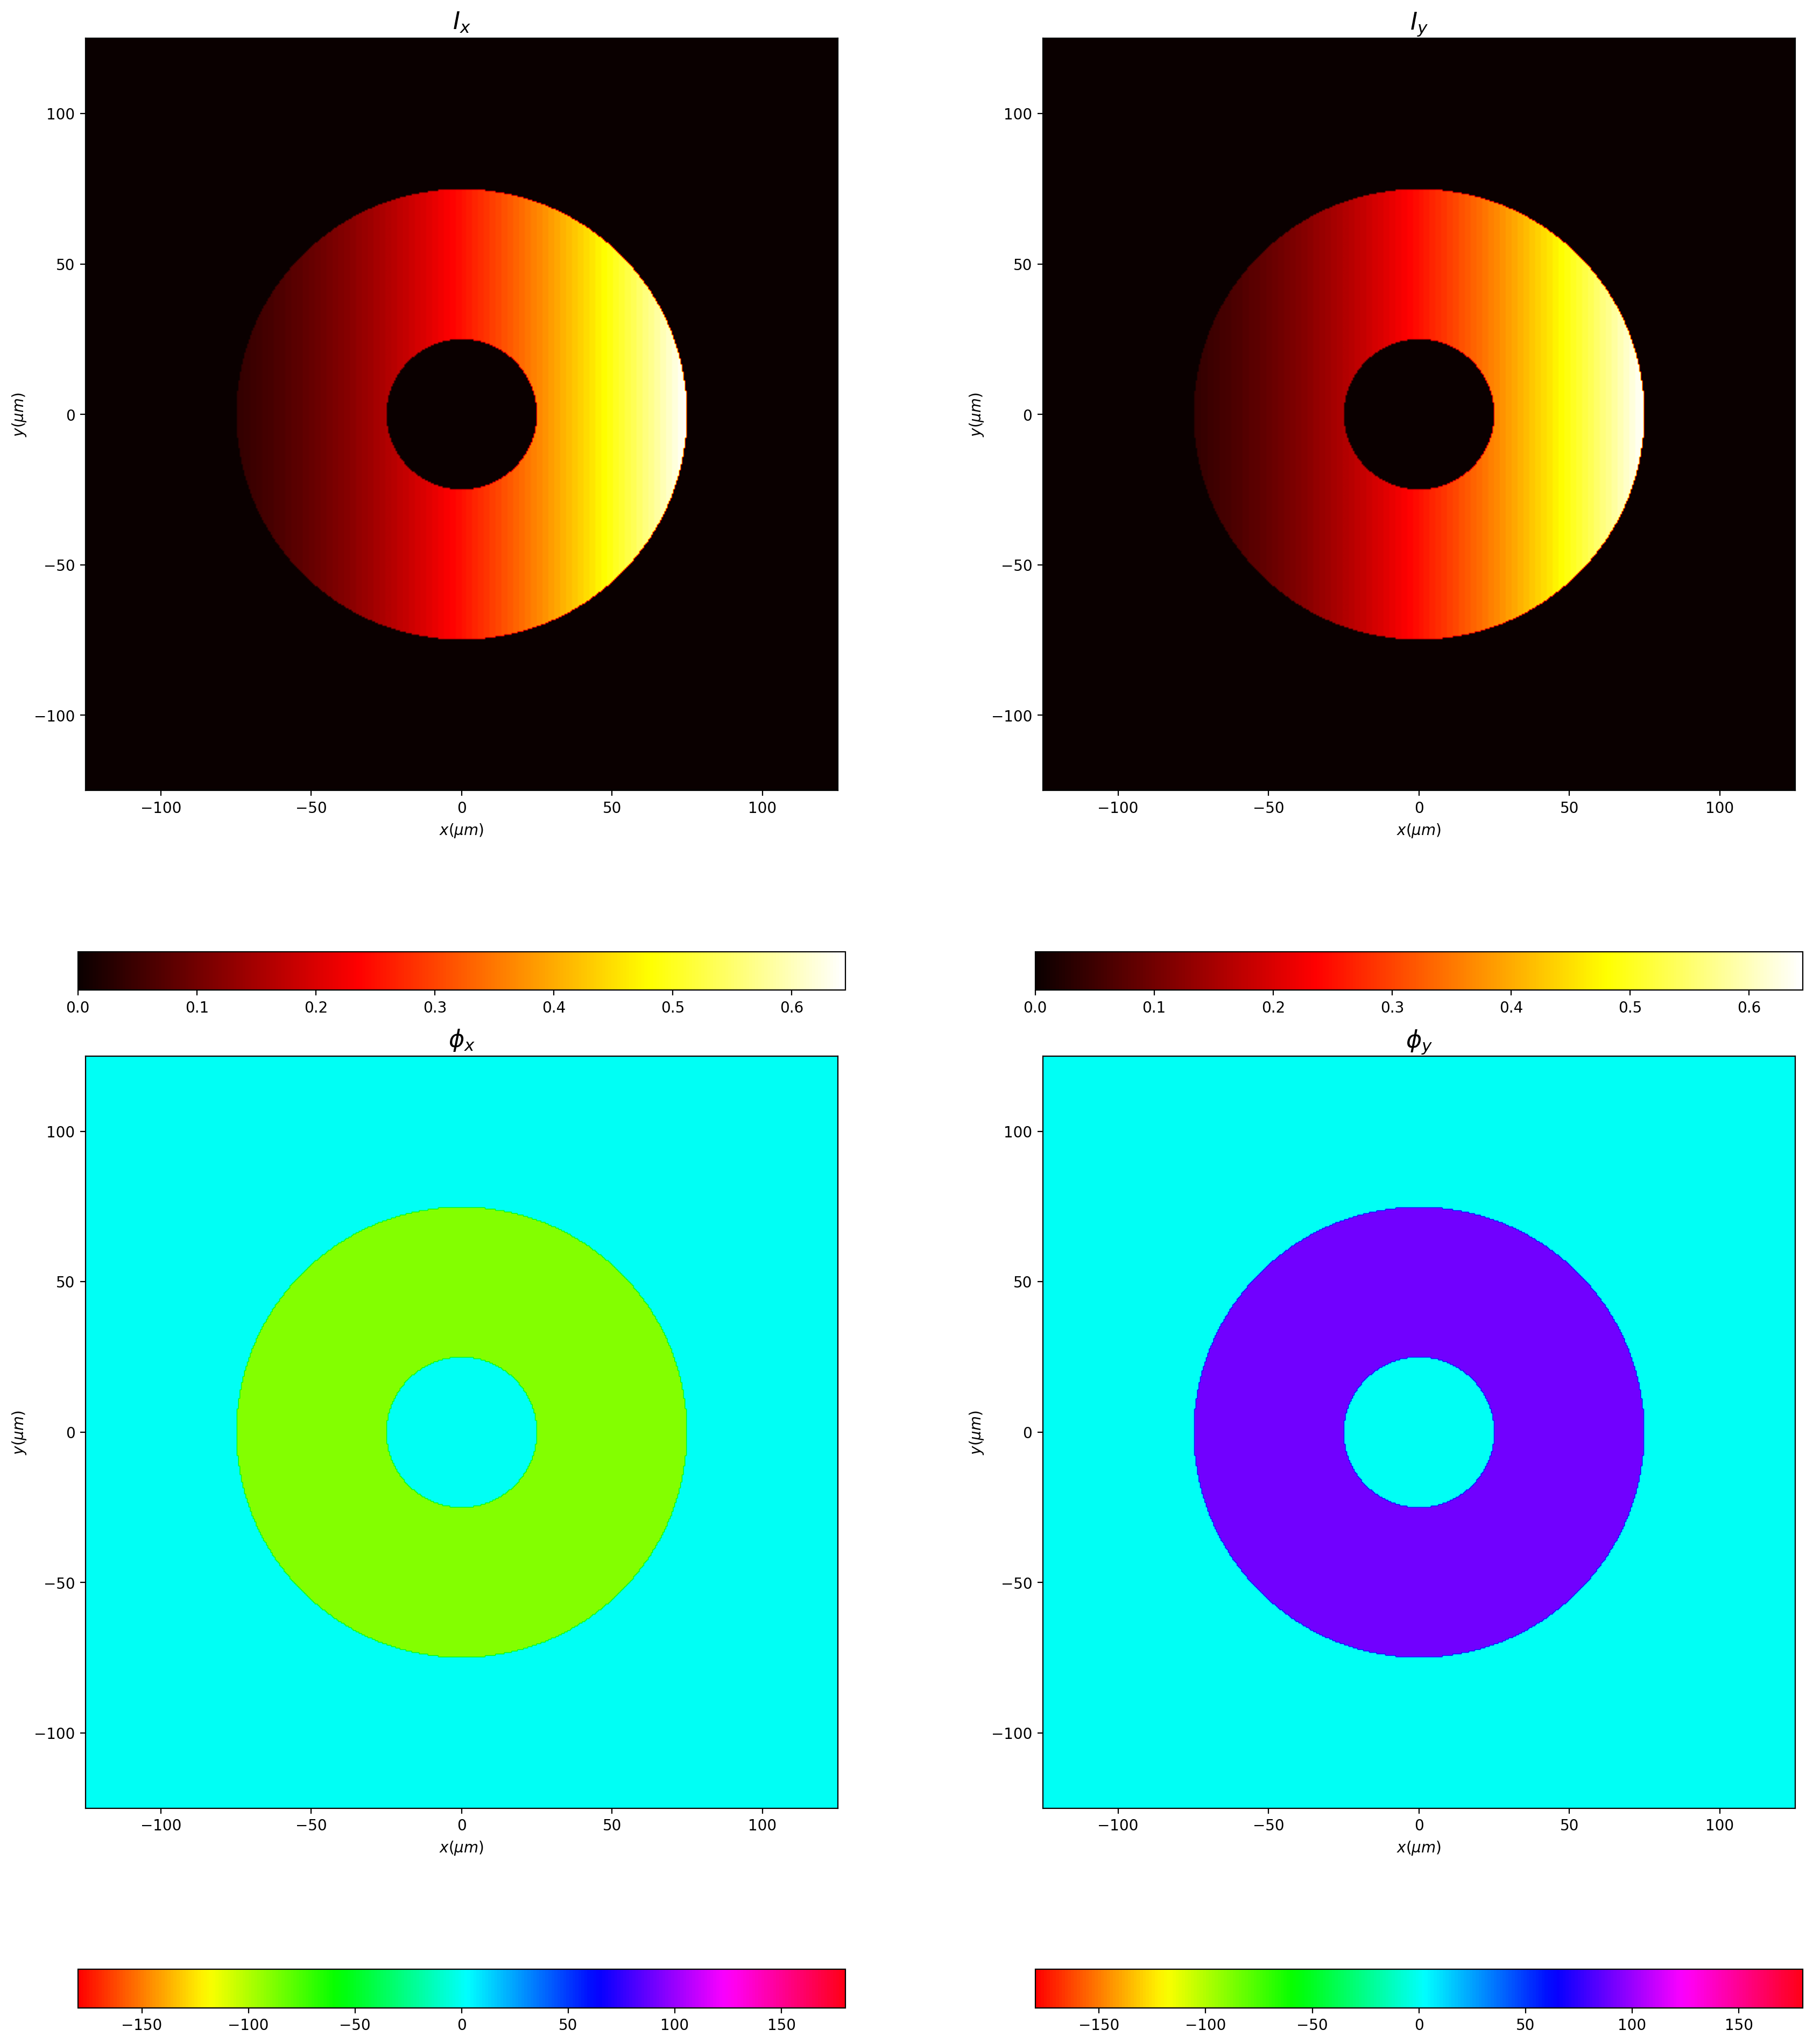

In [6]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask1.gray_scale(num_levels=128, levelMin=0, levelMax=1)


mask2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask2.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
EM0 = Vector_paraxial_mask_XY(x0, y0, wavelength)
EM0.unique_mask(mask=mask1, v=(np.exp(-1j*np.pi/2), np.exp(1j*np.pi/2)))
EM0.global_mask(mask=mask2)
EM0.draw('fields');

Since a circular mask is very used if mask=None, a circular mask, with r0 and radius given in parameters is provided.

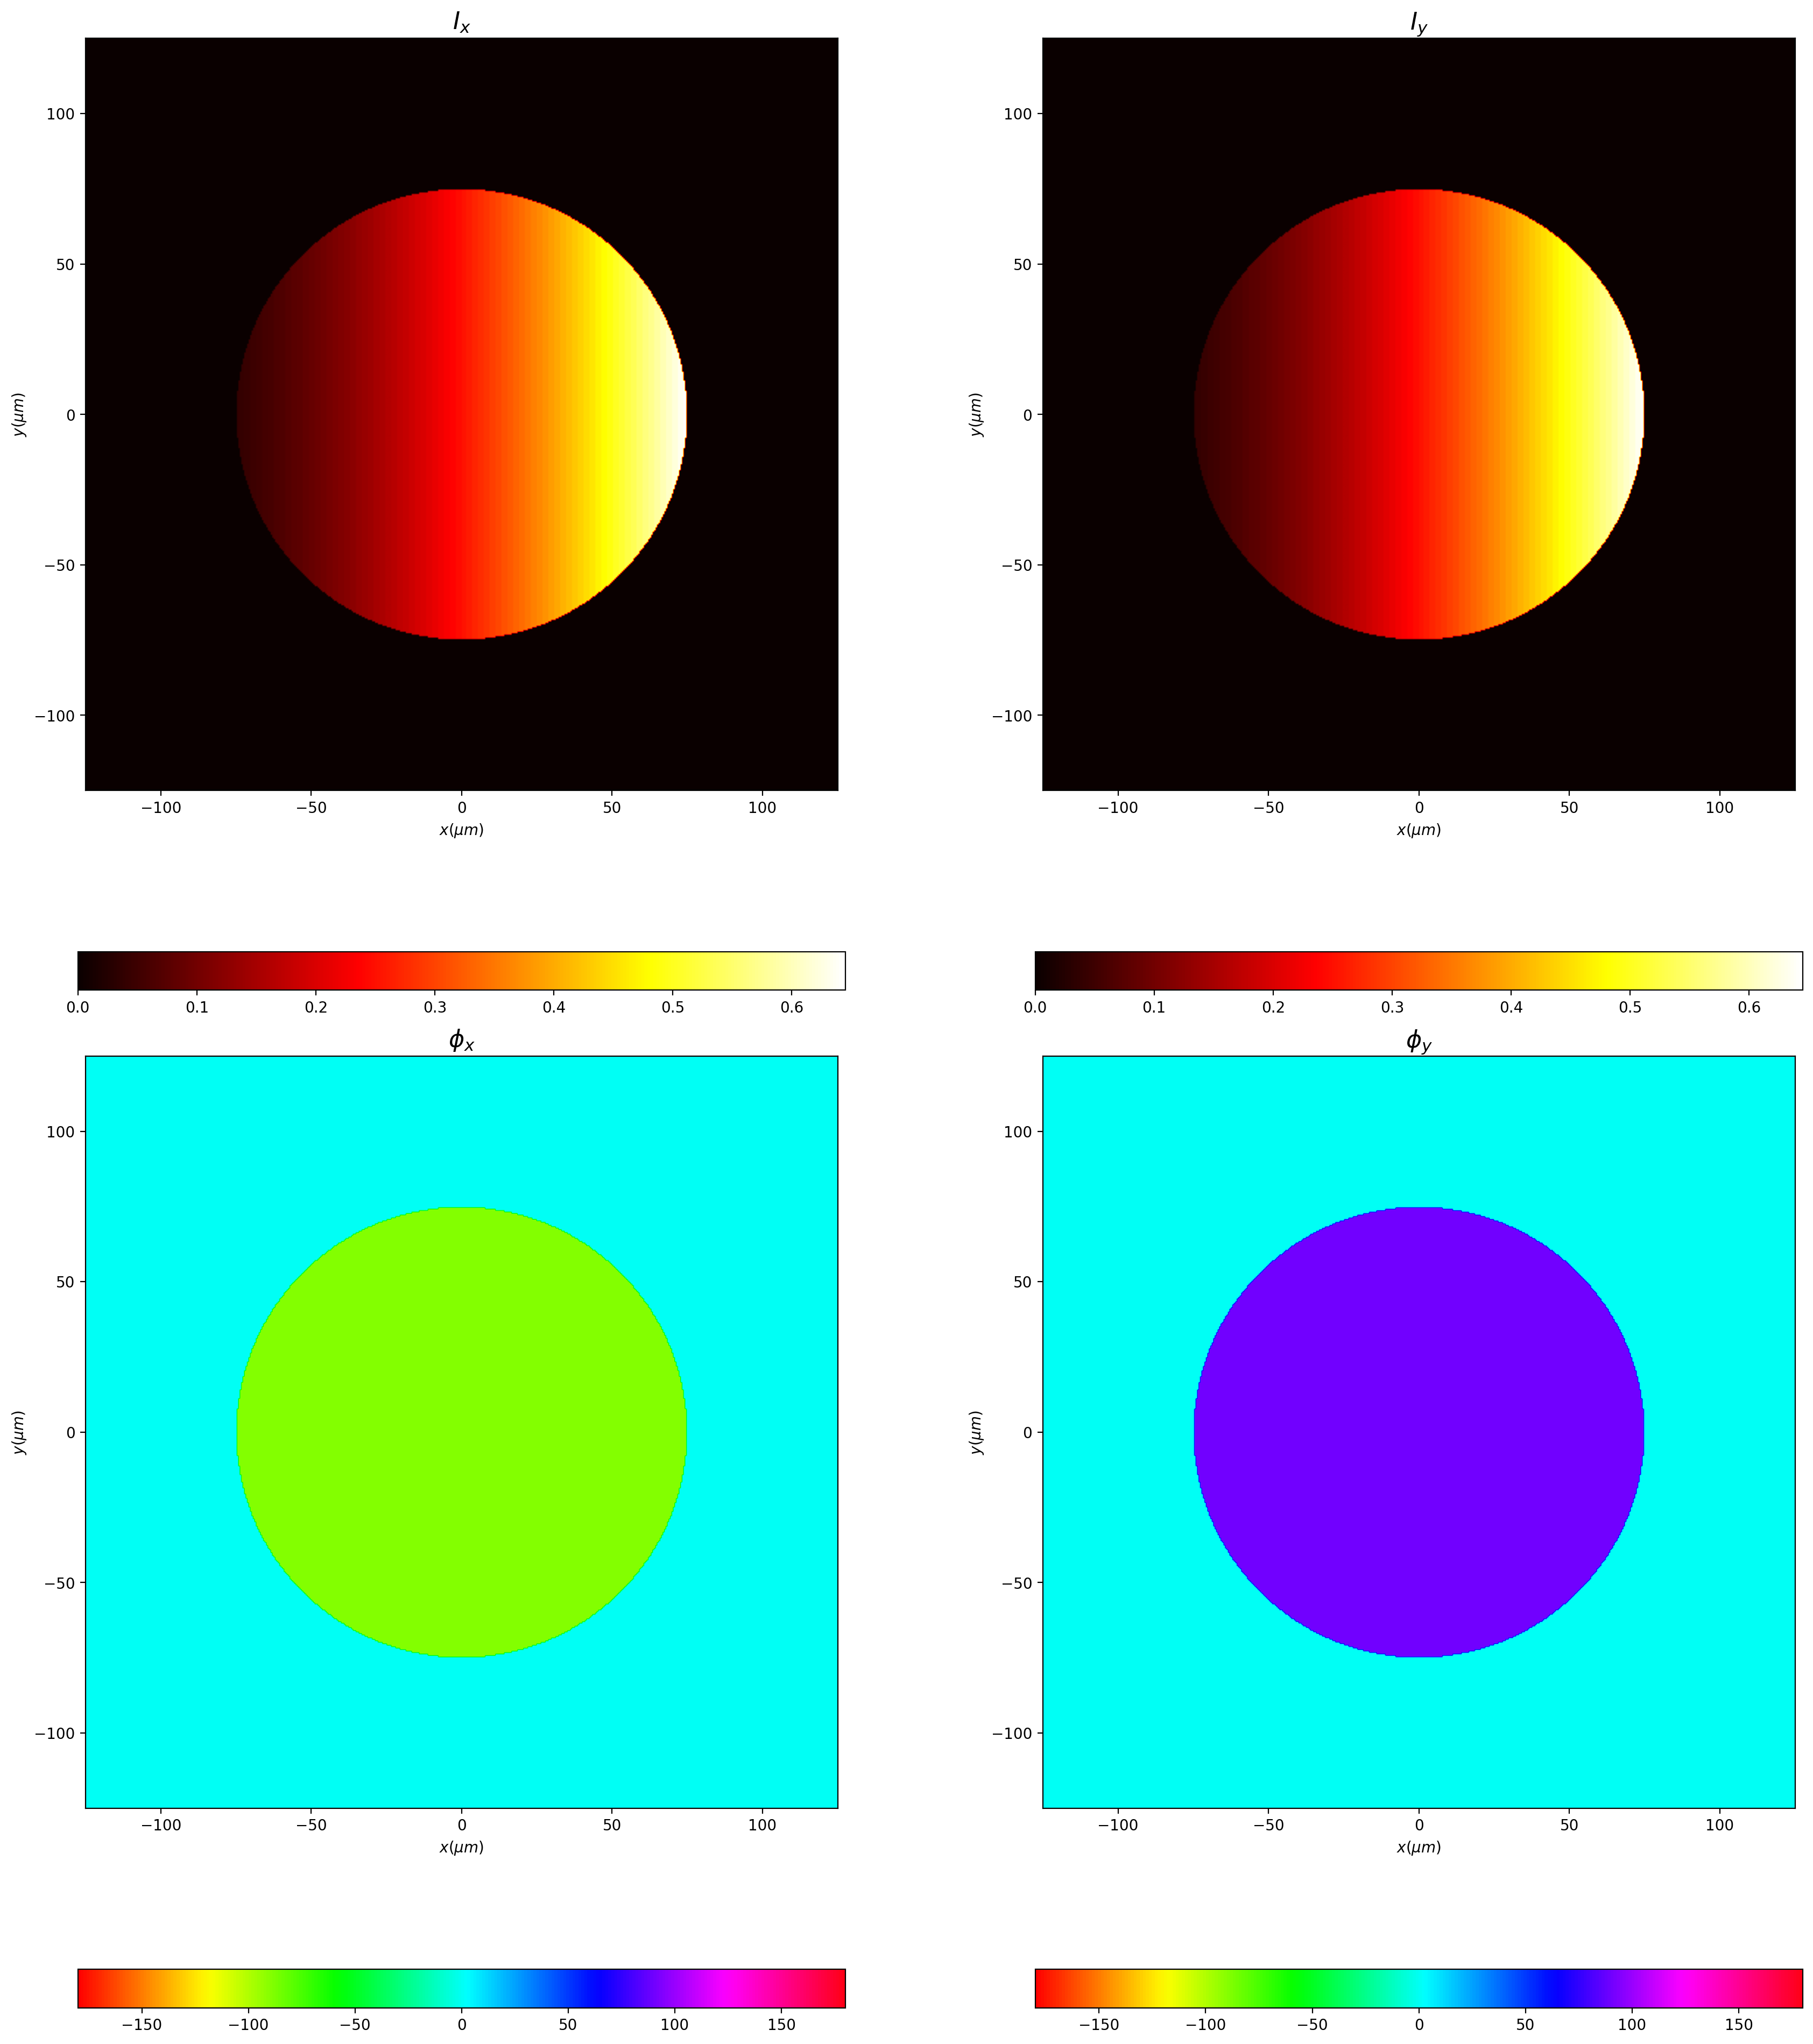

In [7]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um


mask1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask1.gray_scale(num_levels=128, levelMin=0, levelMax=1)


mask2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask2.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
EM0 = Vector_paraxial_mask_XY(x0, y0, wavelength)
EM0.unique_mask(mask=mask1, v=(np.exp(-1j*np.pi/2), np.exp(1j*np.pi/2)))
EM0.global_mask(mask=None, r0=(0,0), radius=(75,75))
EM0.draw('fields');

## Complementary mask

When we provide a binary mask, the 1 mask is converted to v1 polarization and 0 mask is converted to v2 polarization.

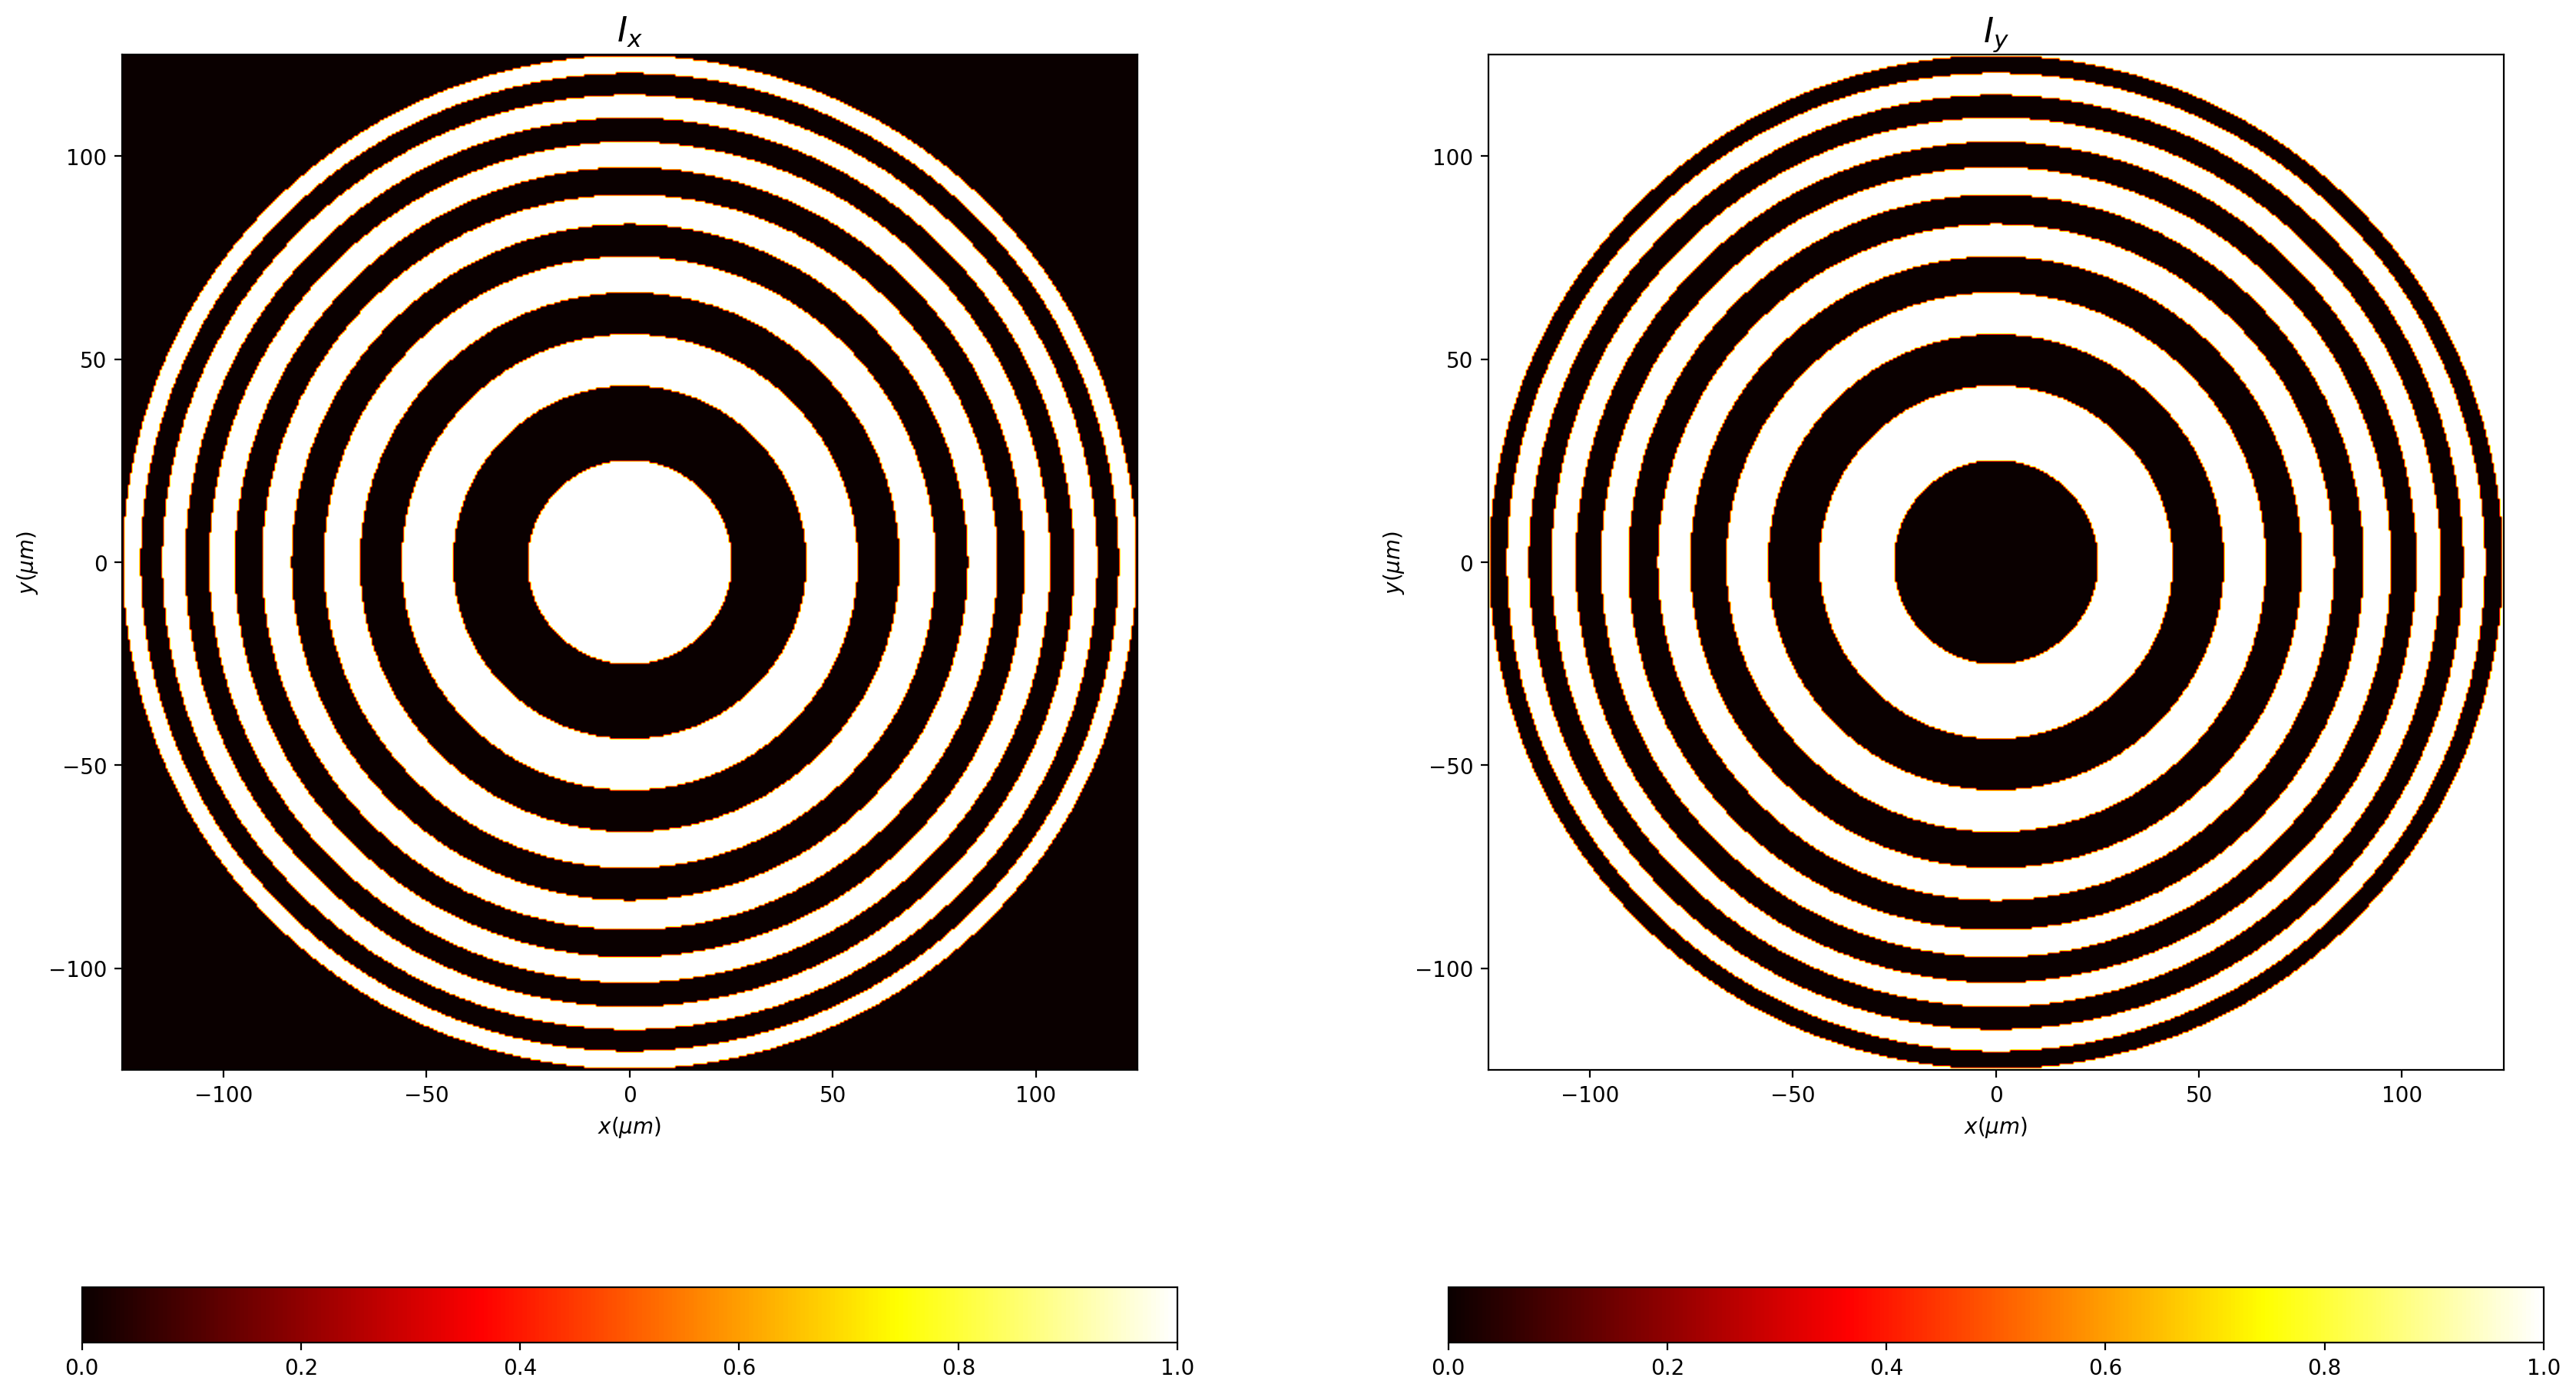

In [8]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(125 * um, 125 * um),
    focal=(2 * mm, 2 * mm),
    angle=0 * degrees,
    mask=True,
    kind='amplitude')

EM0 = Vector_paraxial_mask_XY(x0, y0, wavelength)
EM0.complementary_masks(mask=mask, v1=(1, 0), v2=(0, 1))
EM0.draw(kind='intensities');

## apply polarization
The mask present the polarization properties of a Jones matrix. Also a Jones_matrix class from py_pol can be provided

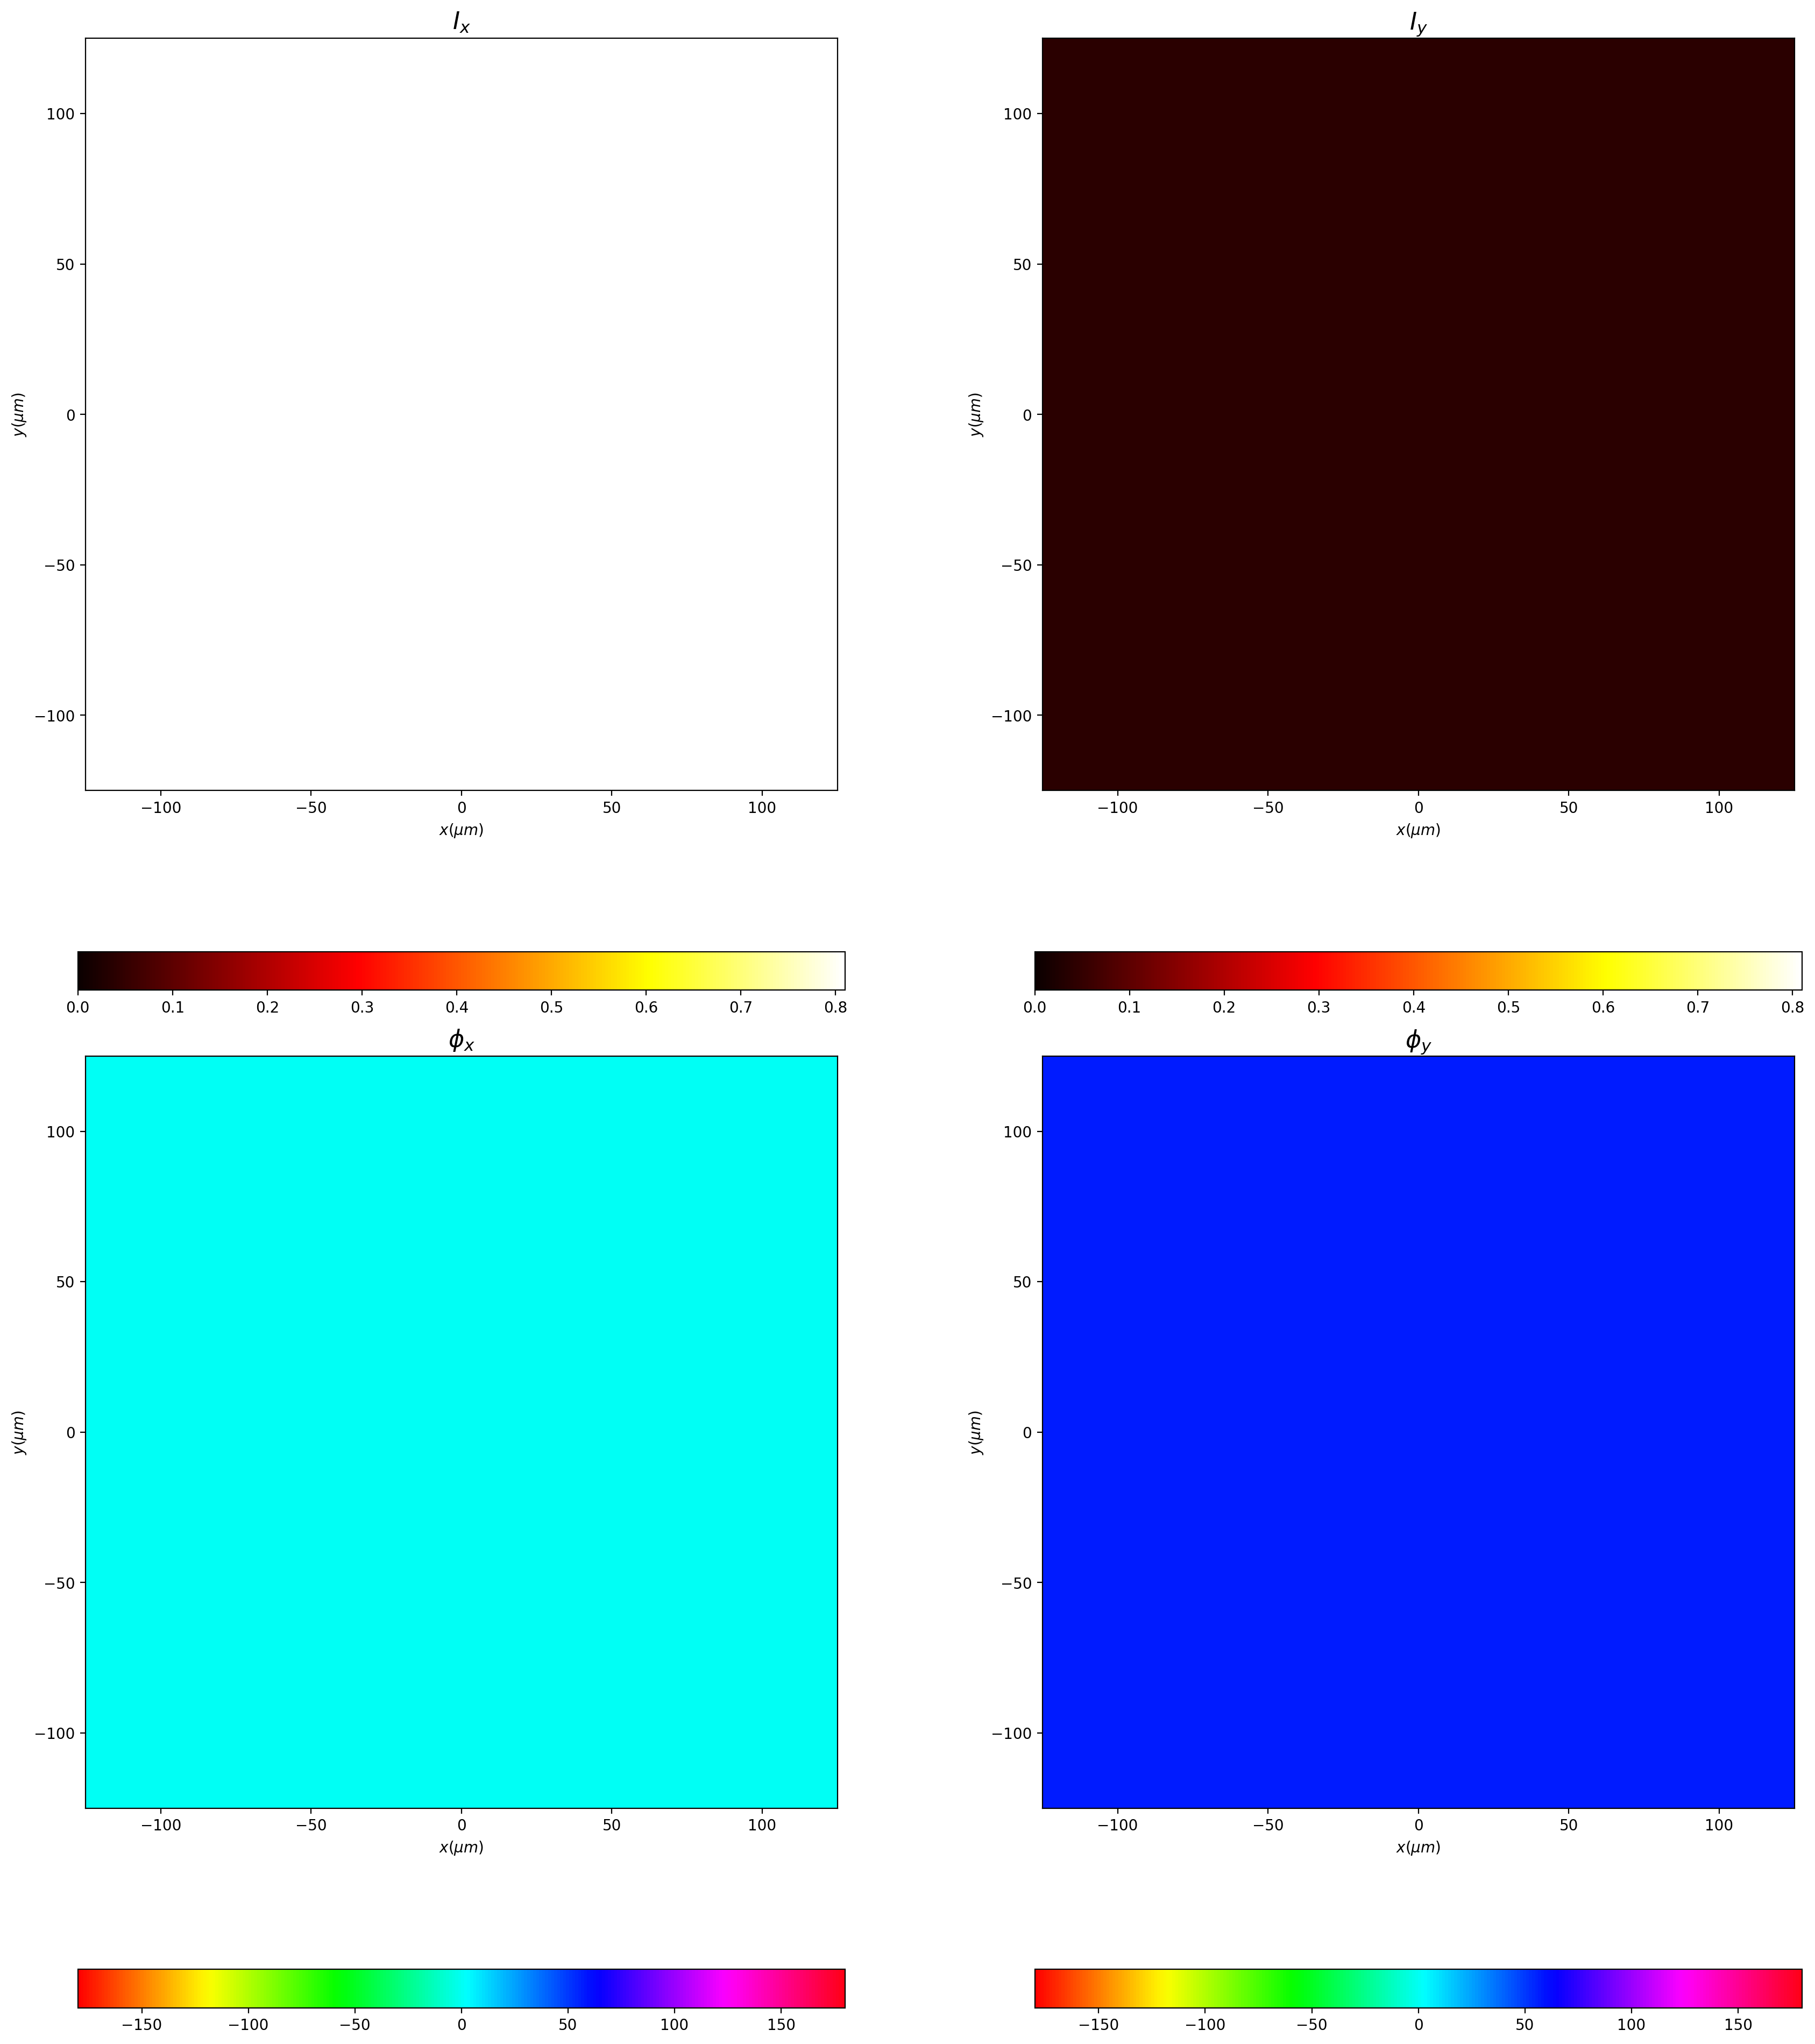

In [9]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um


PL = Jones_matrix('m0')
PL.from_elements(0.9, 0, 0, 0.2 * np.exp(1j))

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.apply_polarization(PL)

vp.draw(kind='fields');

## Polarization from standard elements

Using py_pol, other standard polarizers can be determined.

### linear polarizer

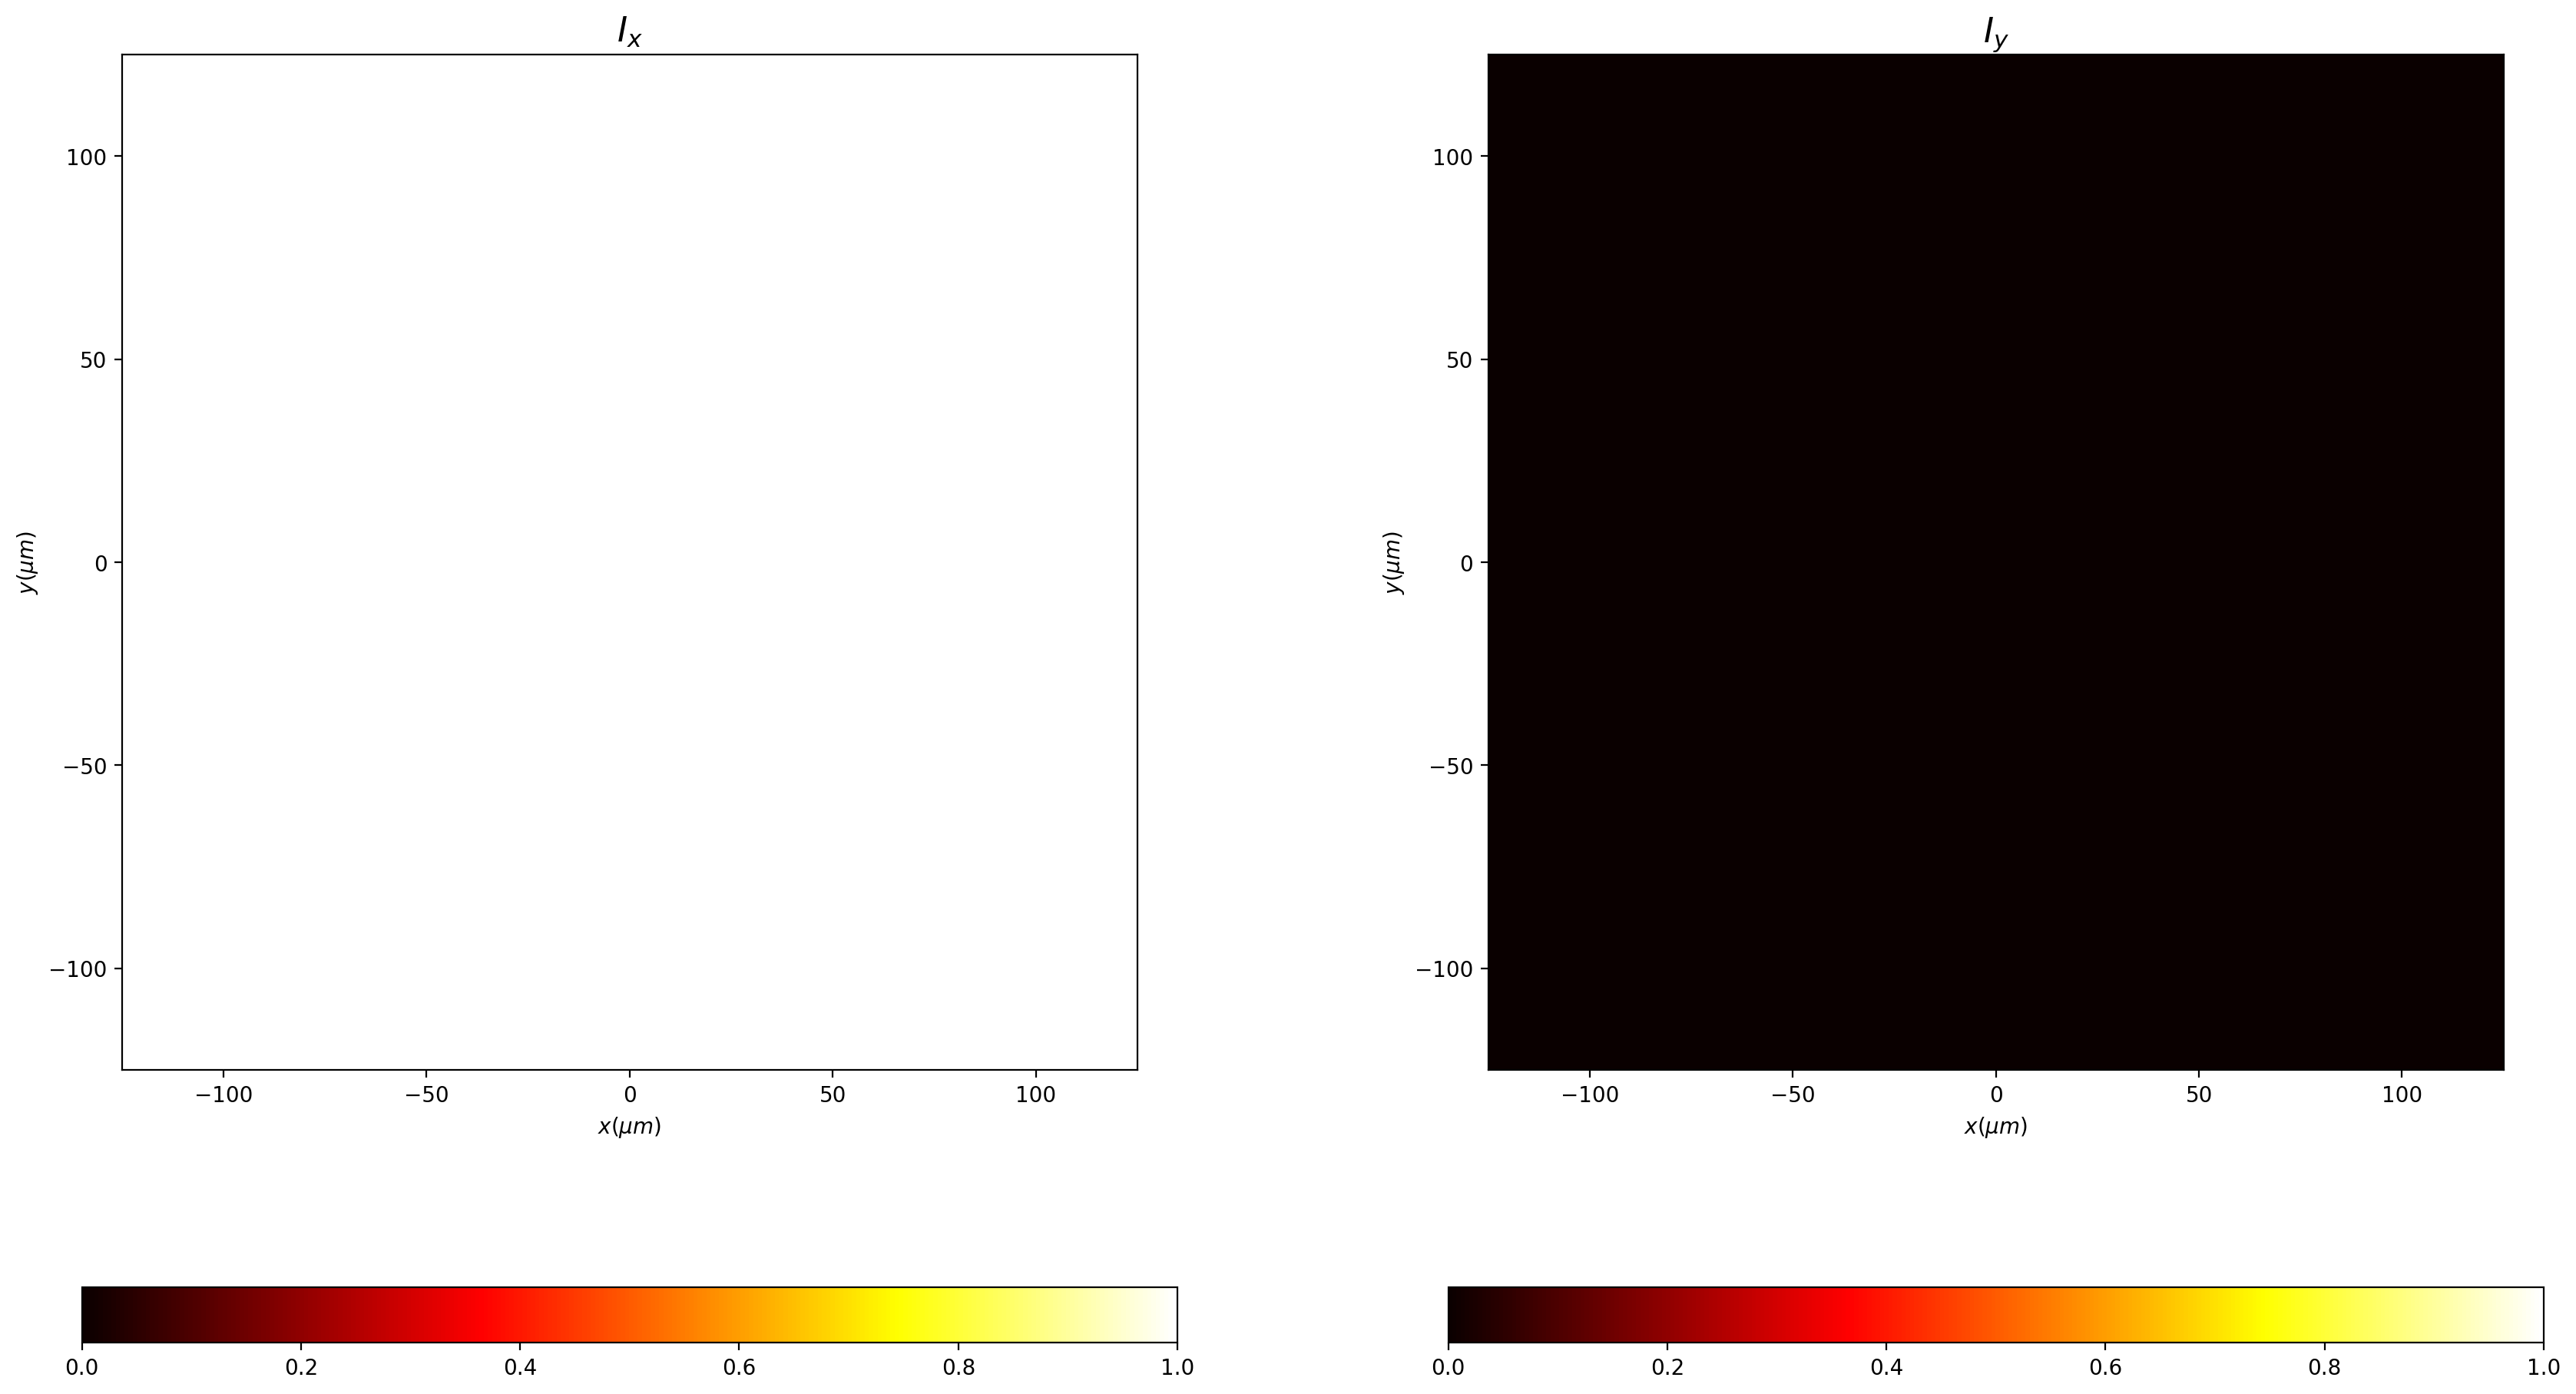

In [10]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um


vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.polarizer_linear(angle=0 * degrees)

vp.draw(kind='intensities');

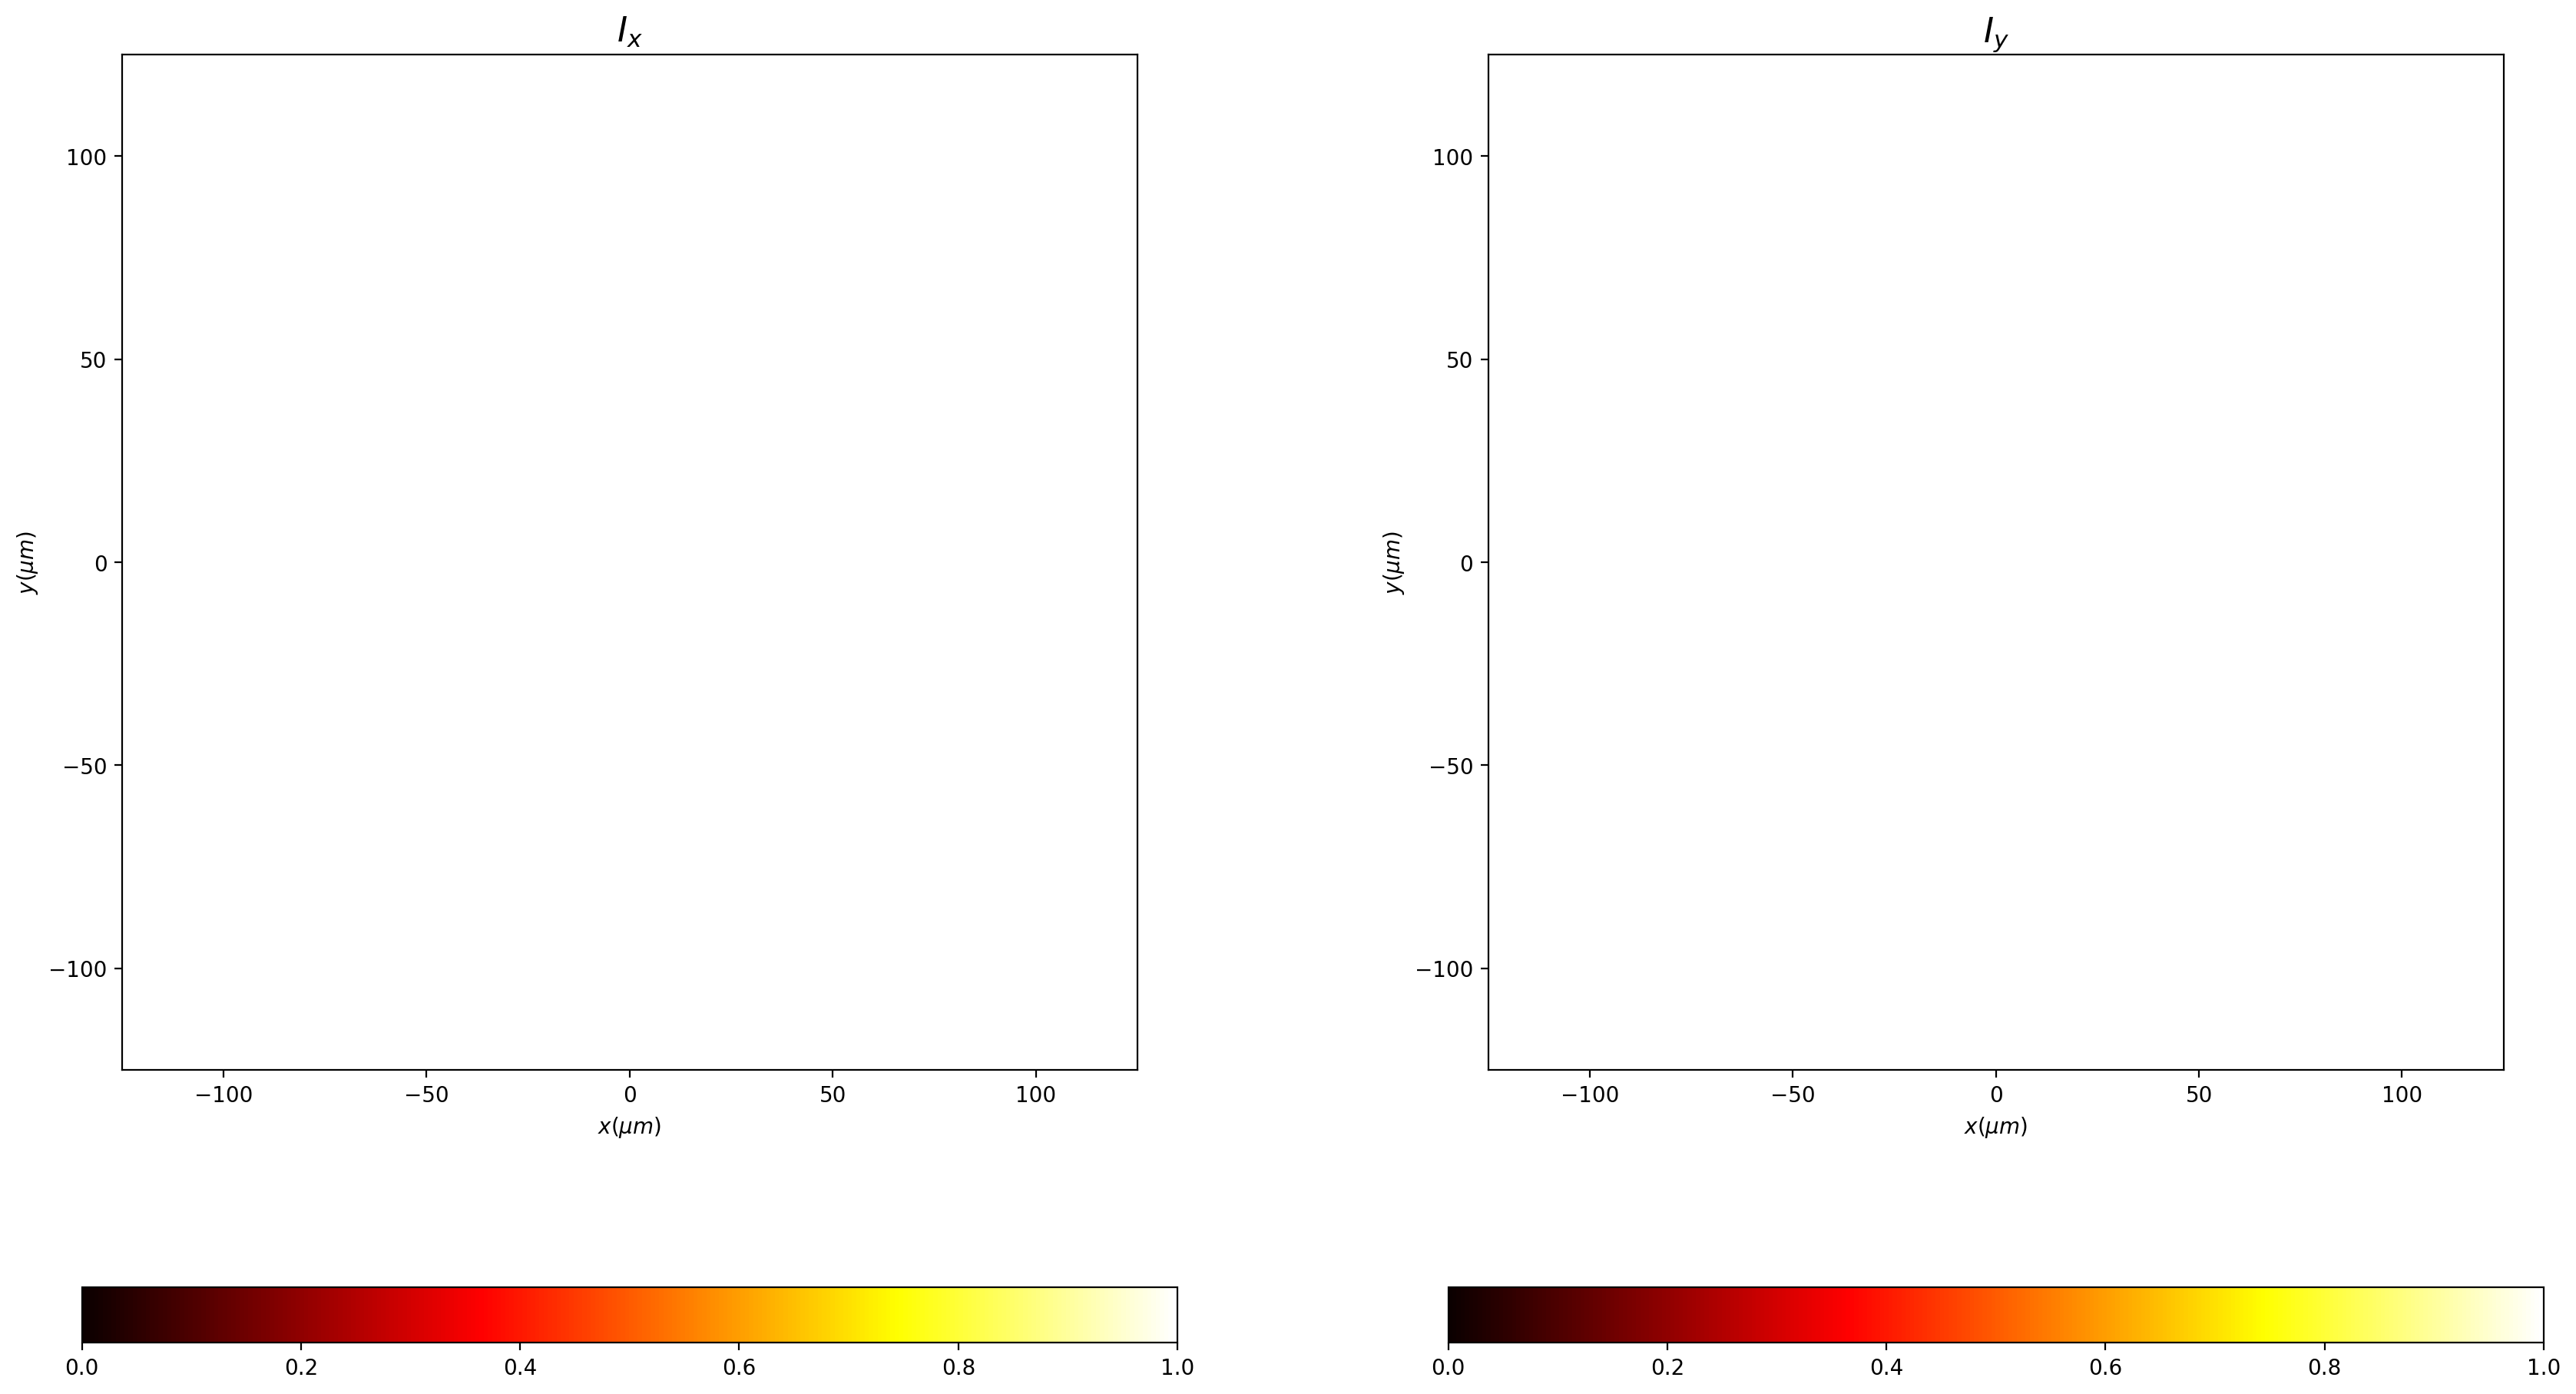

In [11]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.polarizer_linear(angle=45 * degrees)

vp.draw(kind='intensities');

### quarter waveplate

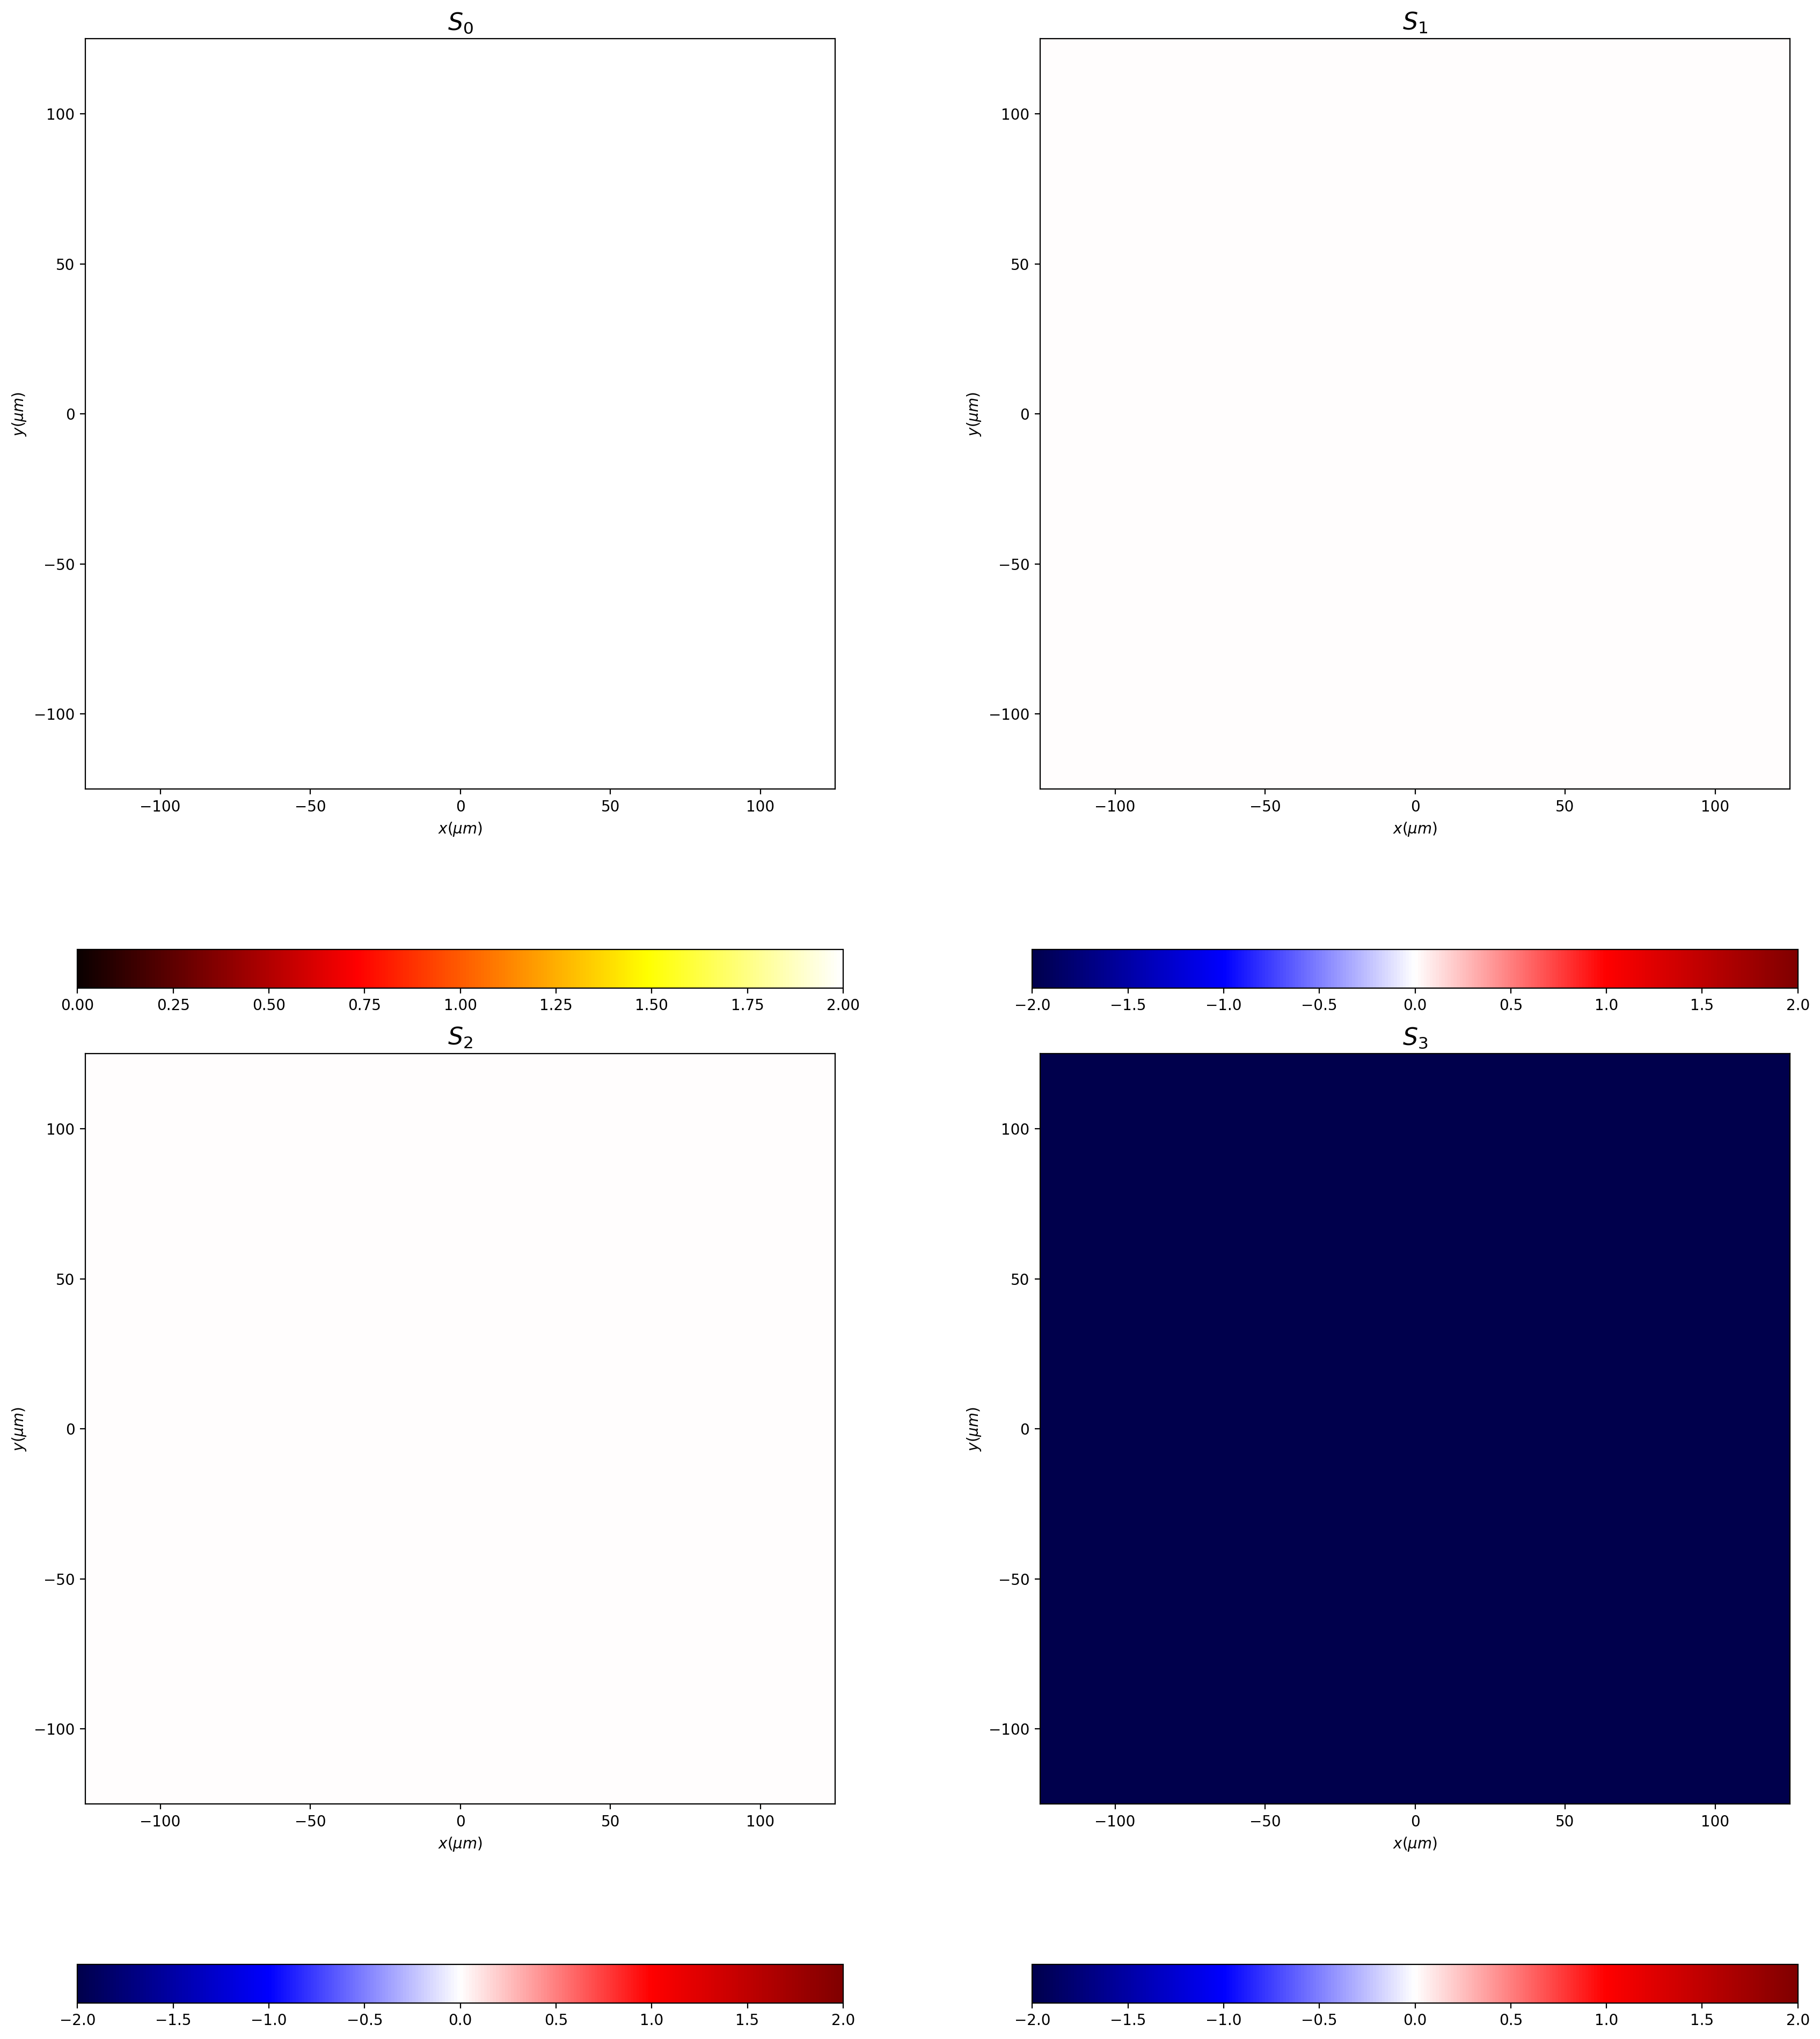

In [12]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.quarter_waveplate(angle=0 * degrees)

vp.draw(kind='stokes');

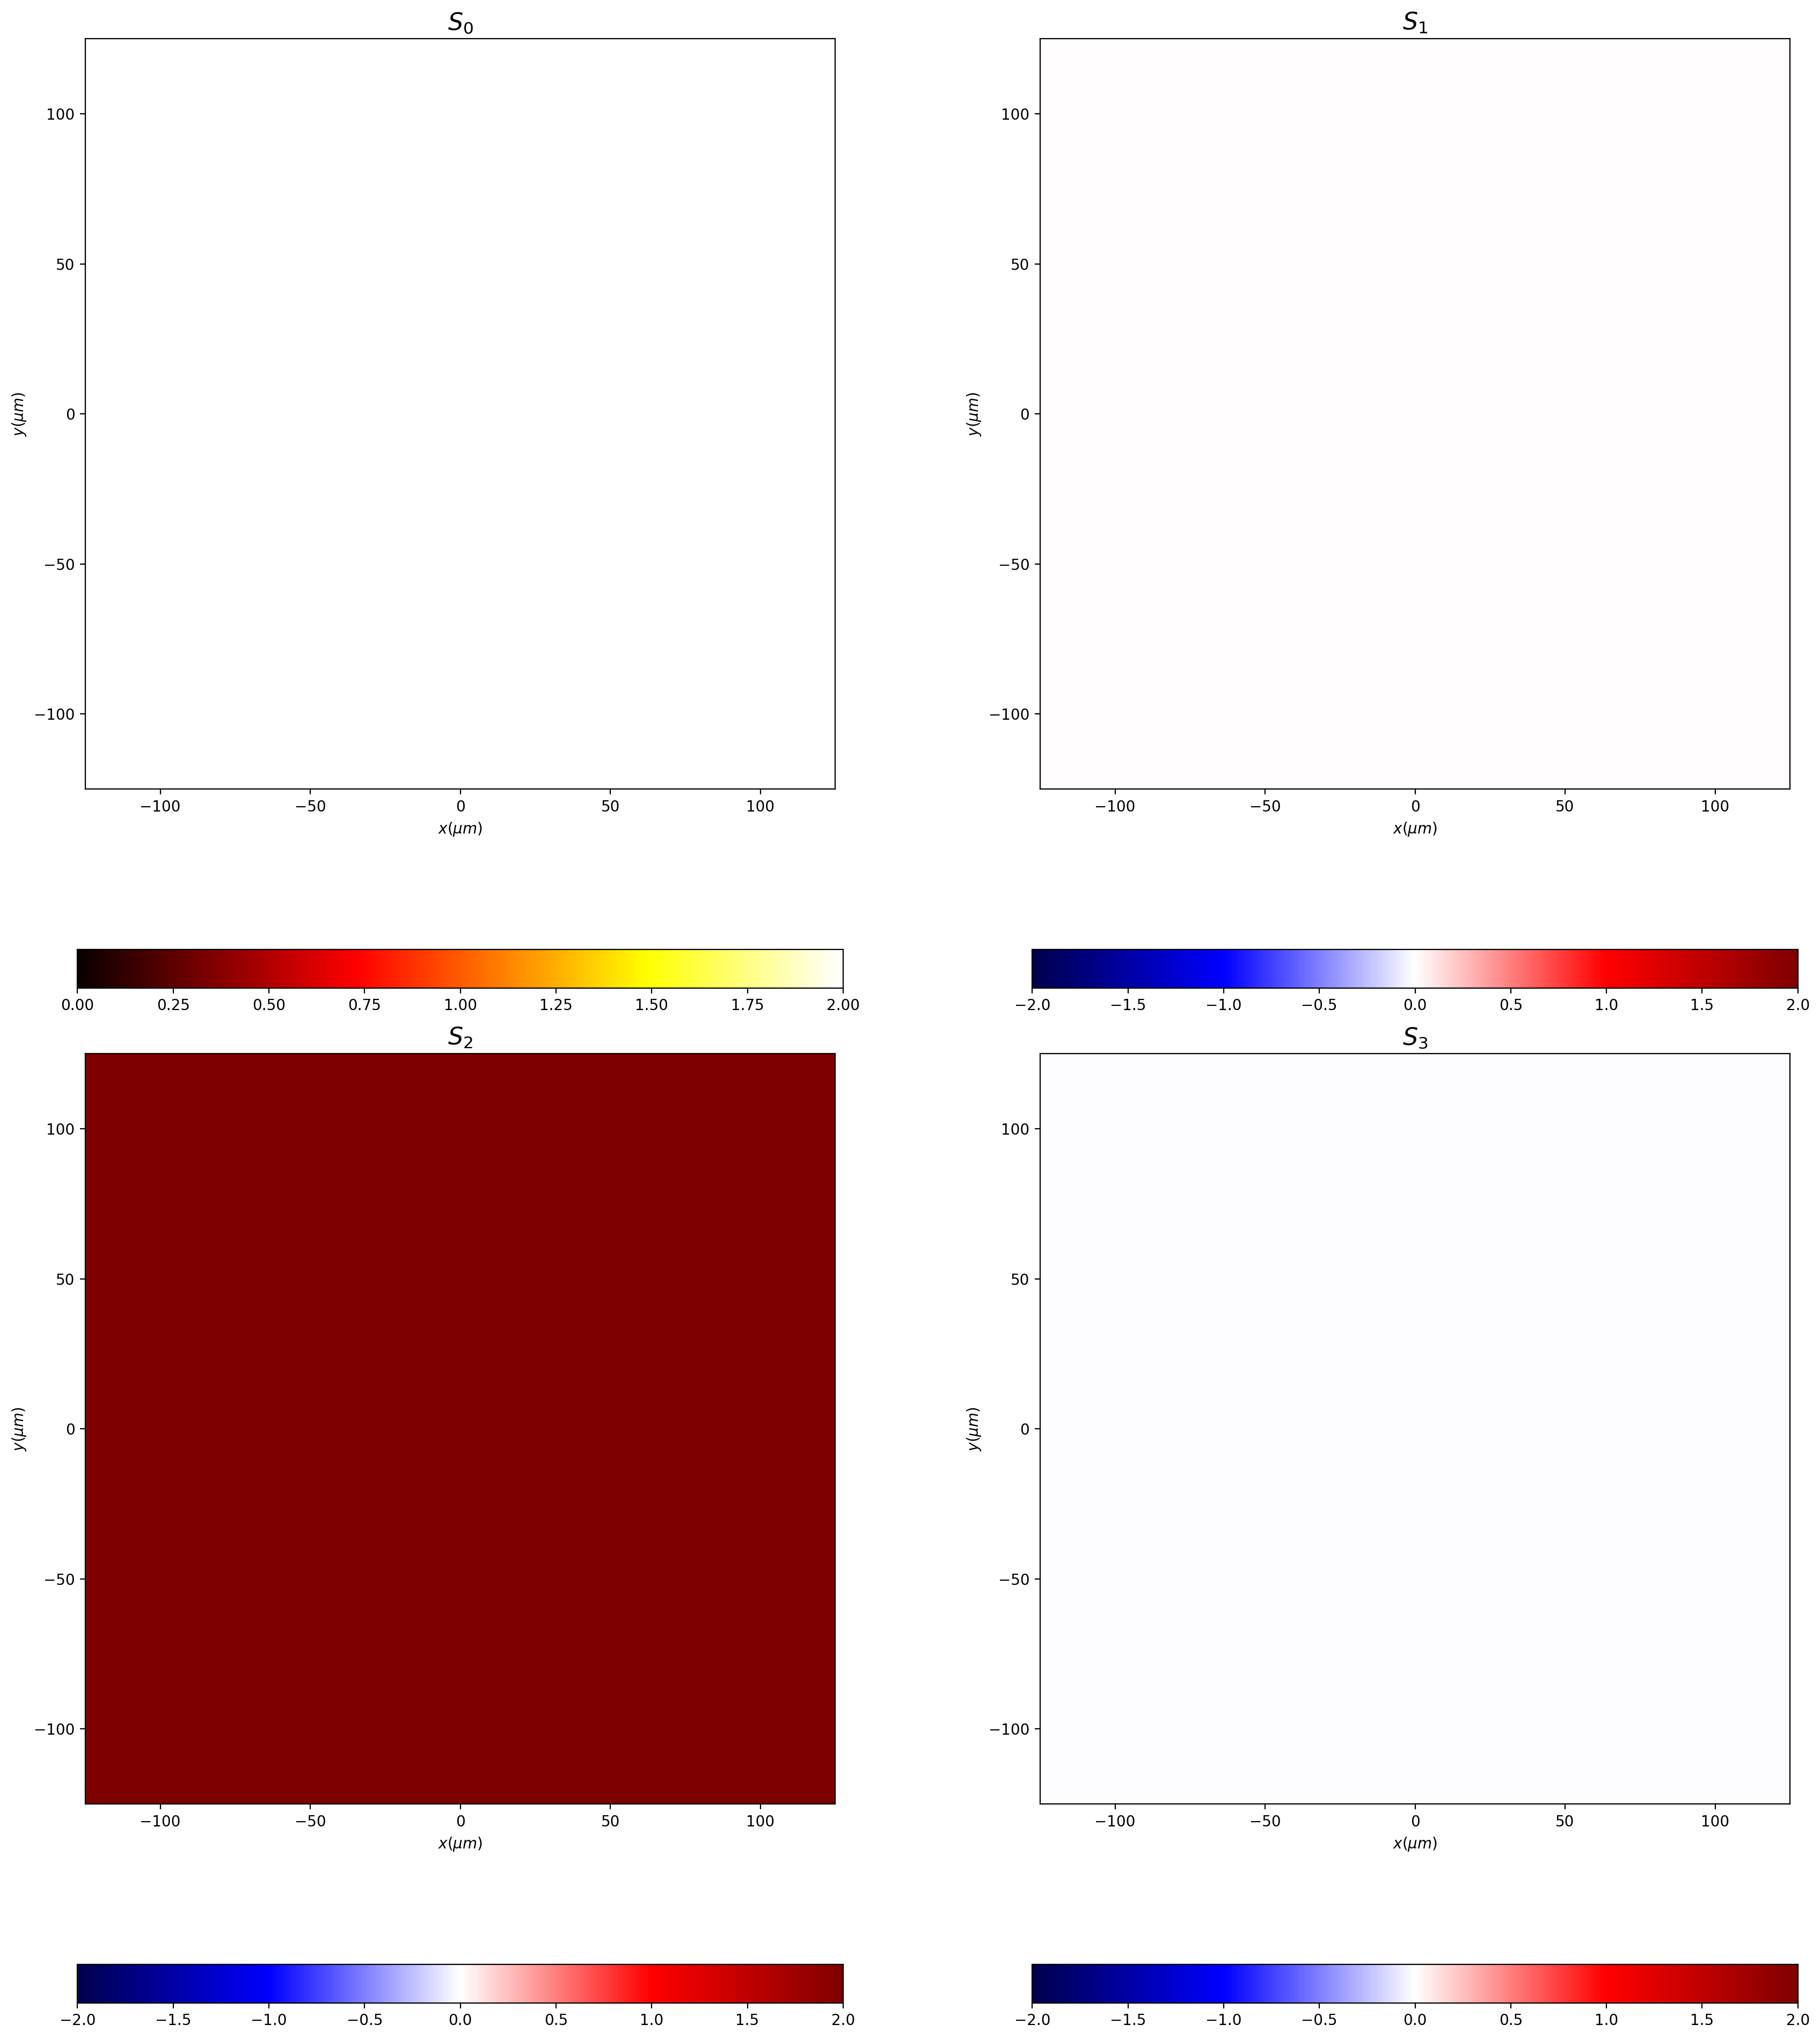

In [13]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.quarter_waveplate(angle=45 * degrees)

vp.draw(kind='stokes');

## Half wave

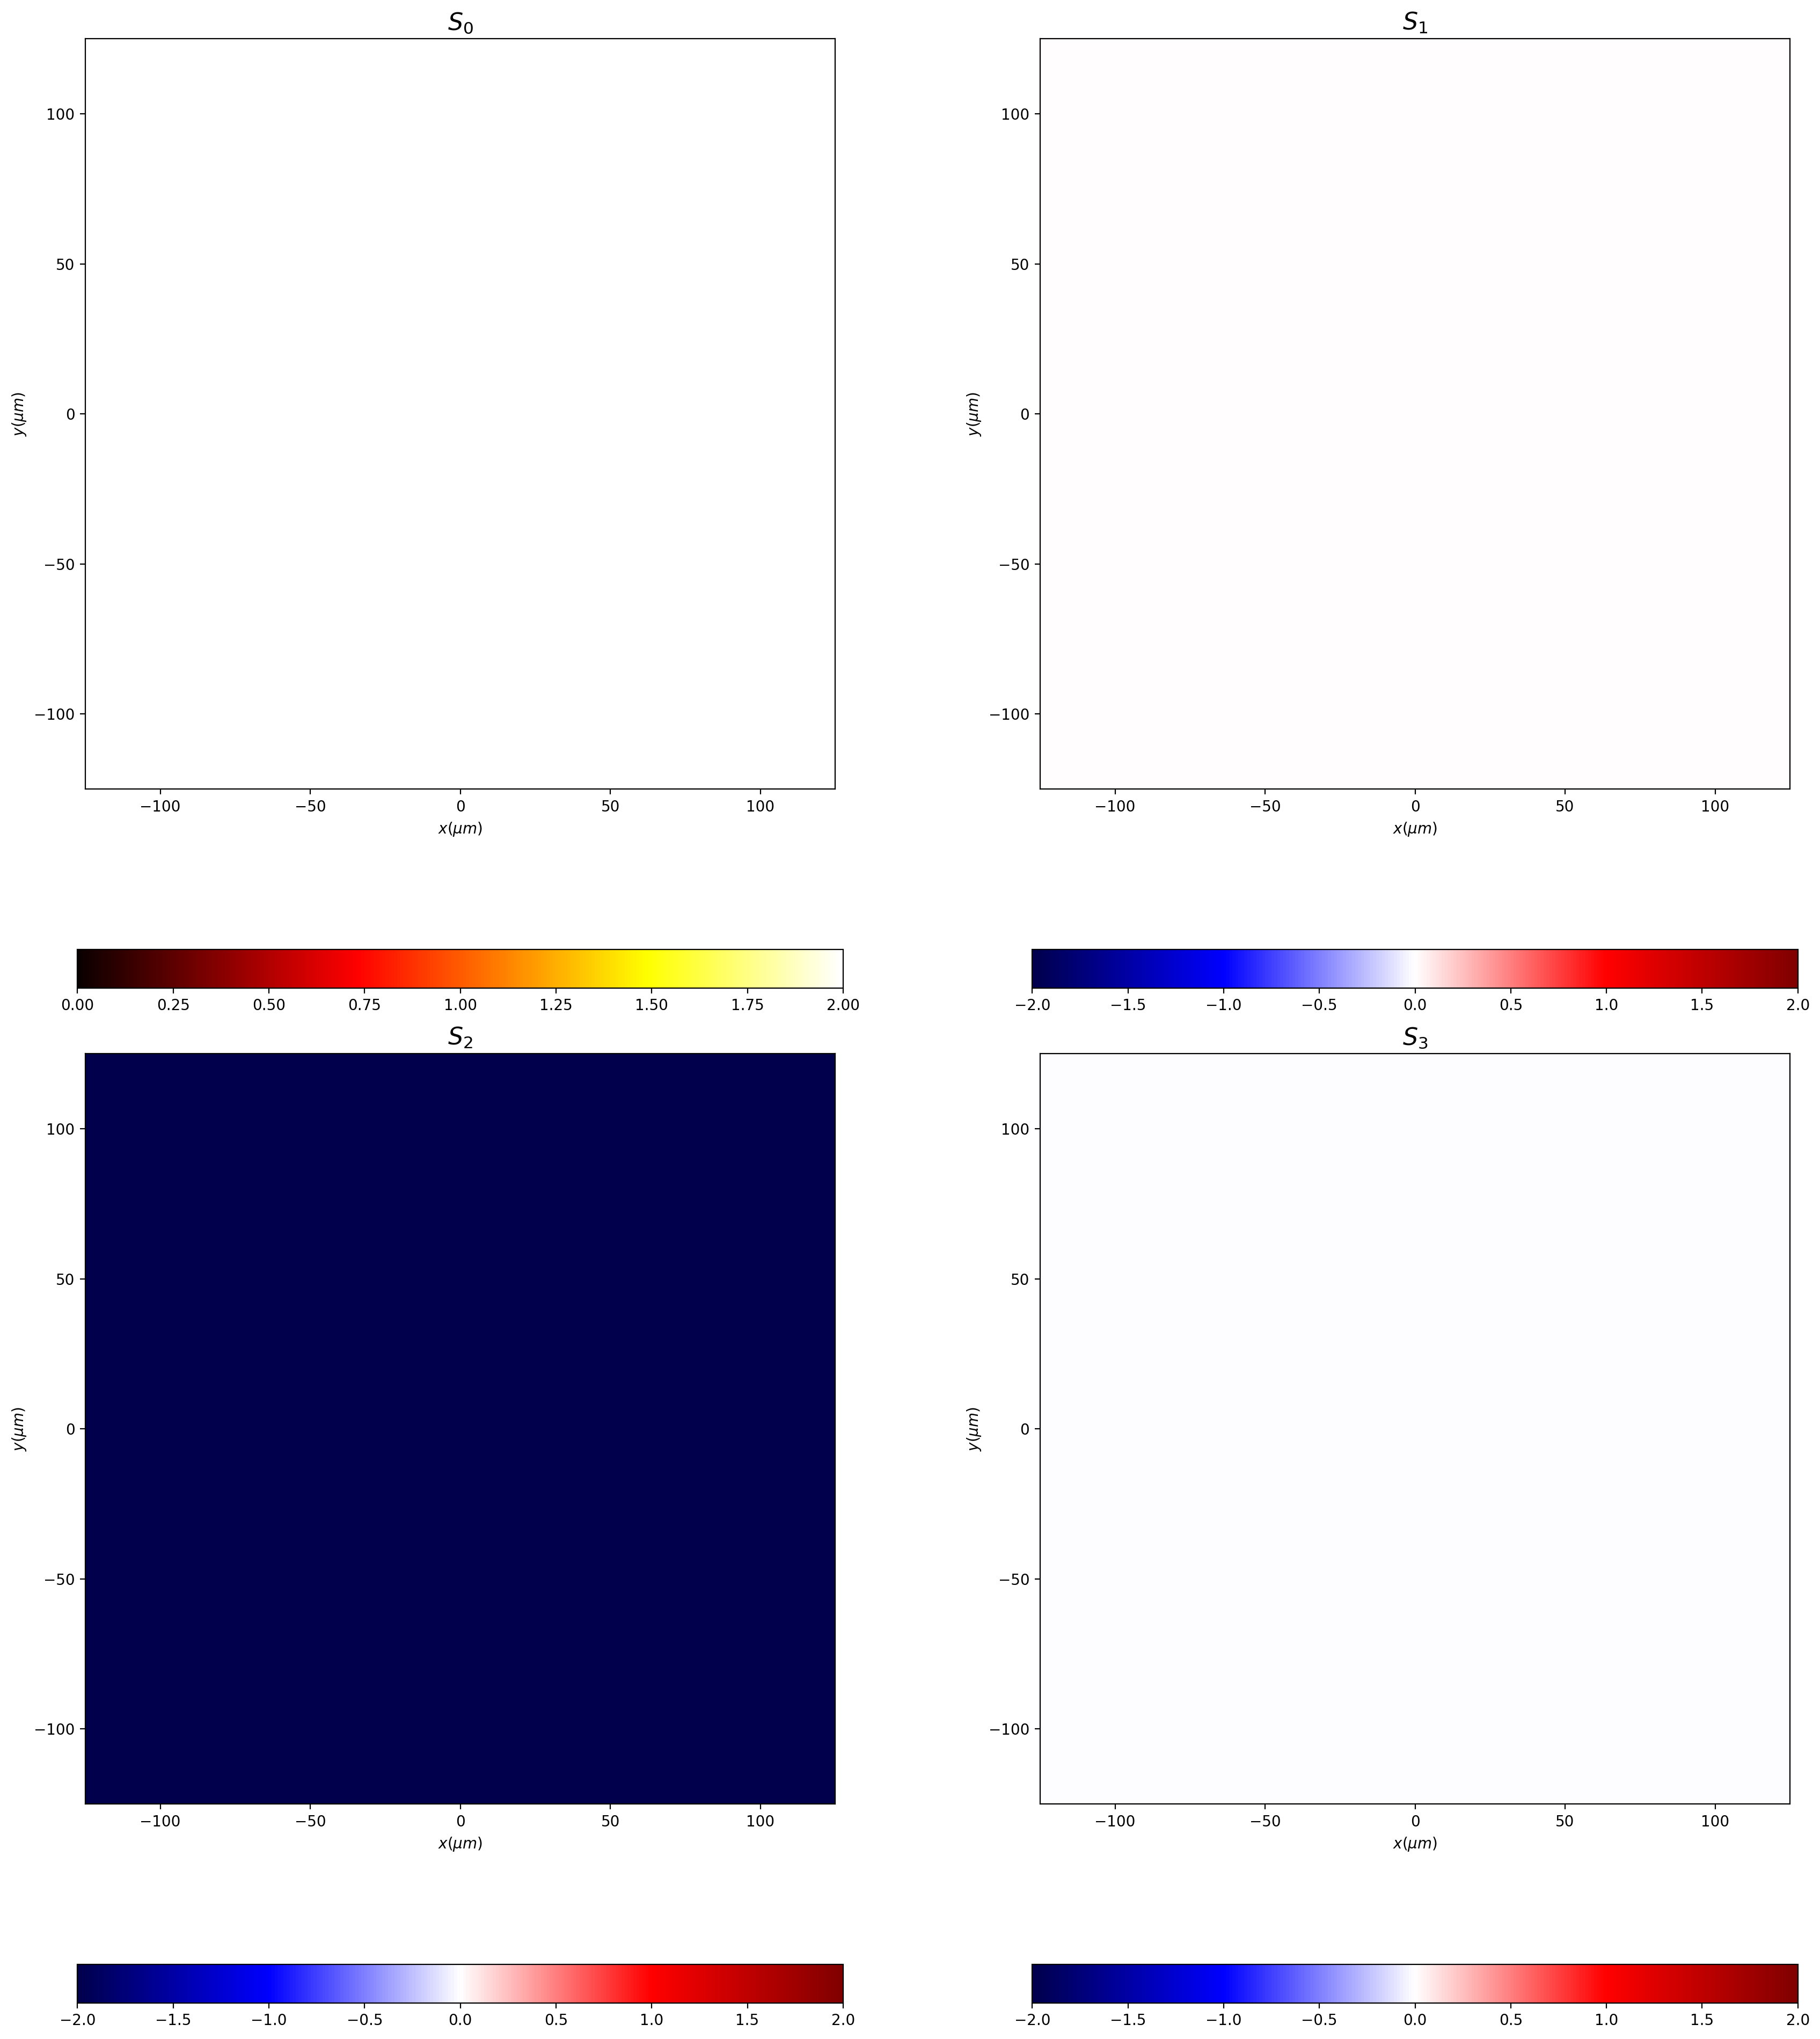

In [14]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.half_waveplate(angle=0 * degrees)

vp.draw(kind='stokes');

### retarder

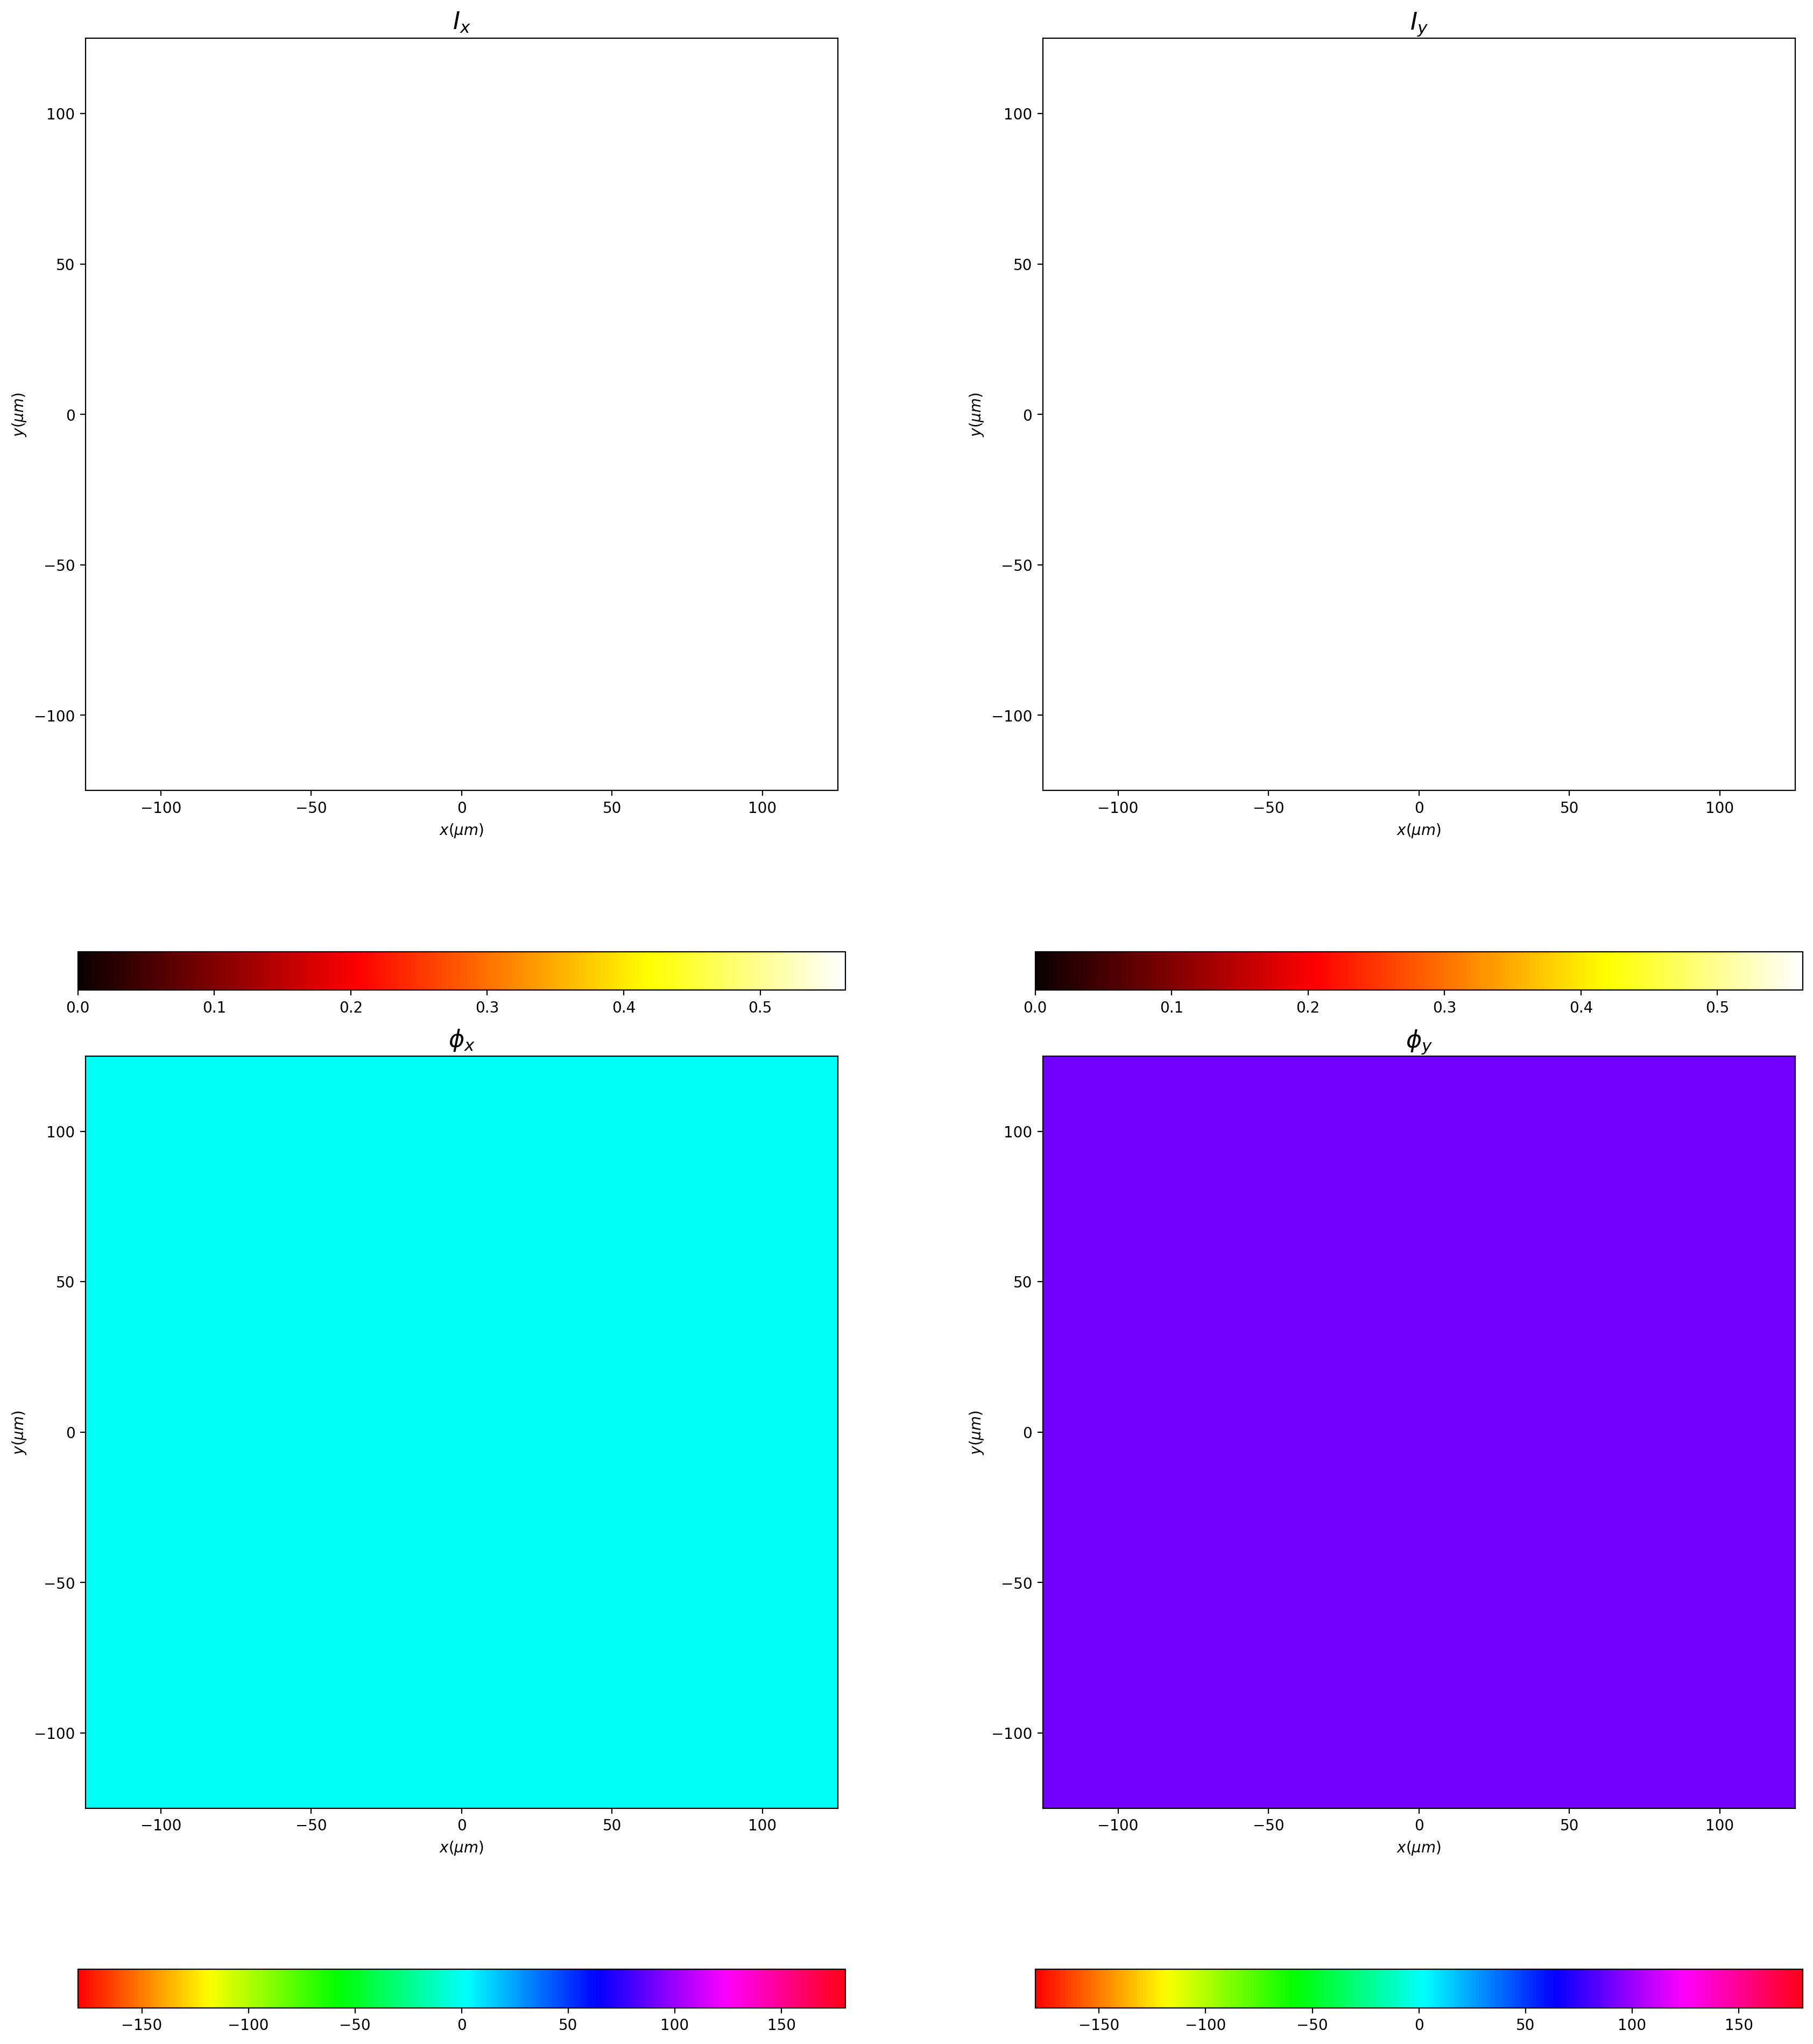

In [15]:
x0 = np.linspace(-125*um, 125*um, 512)
y0 =  np.linspace(-125*um, 125*um, 512)
wavelength = 0.6328 * um

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.polarizer_retarder(
    delay=90 * degrees, p1=0.75, p2=0.25, angle=0 * degrees)

vp.draw(kind='fields');